# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

In [6]:
from utility import*

In [7]:
import openpyxl

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



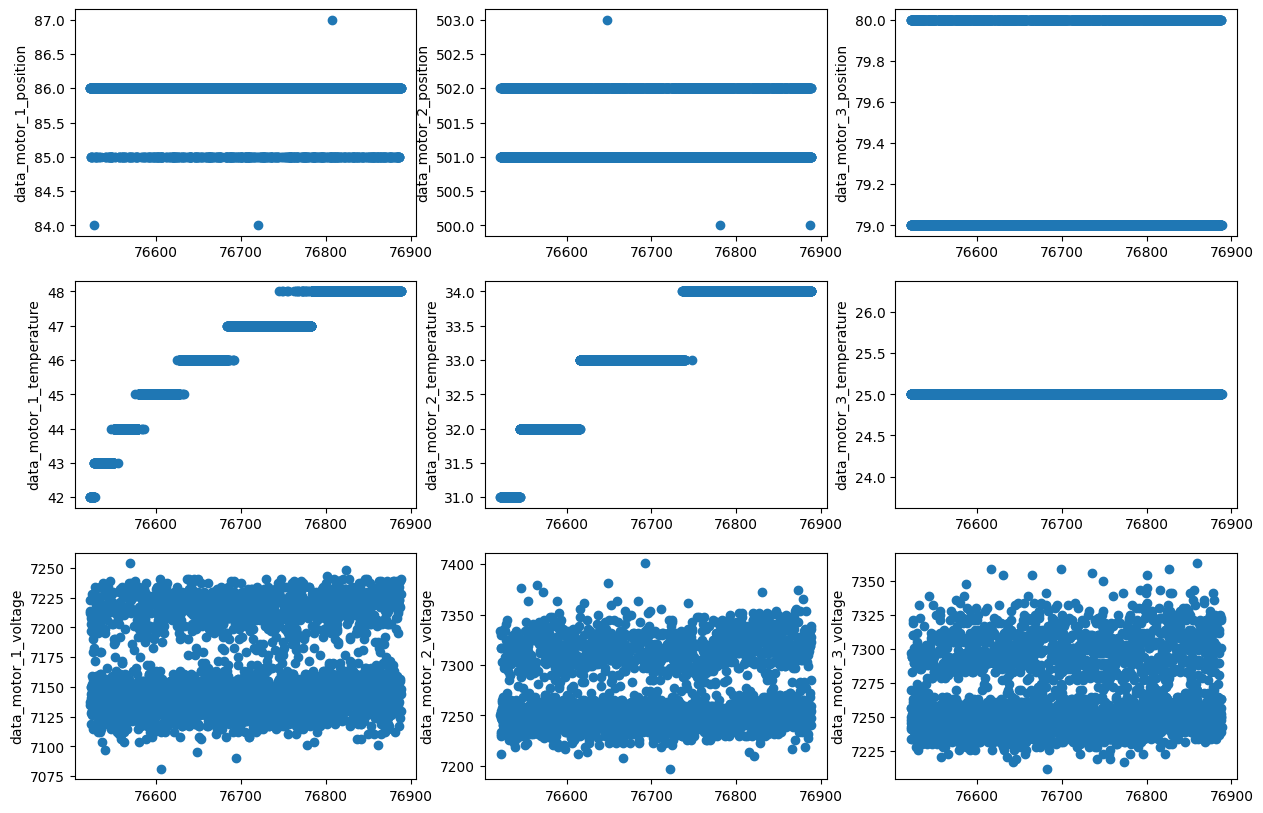

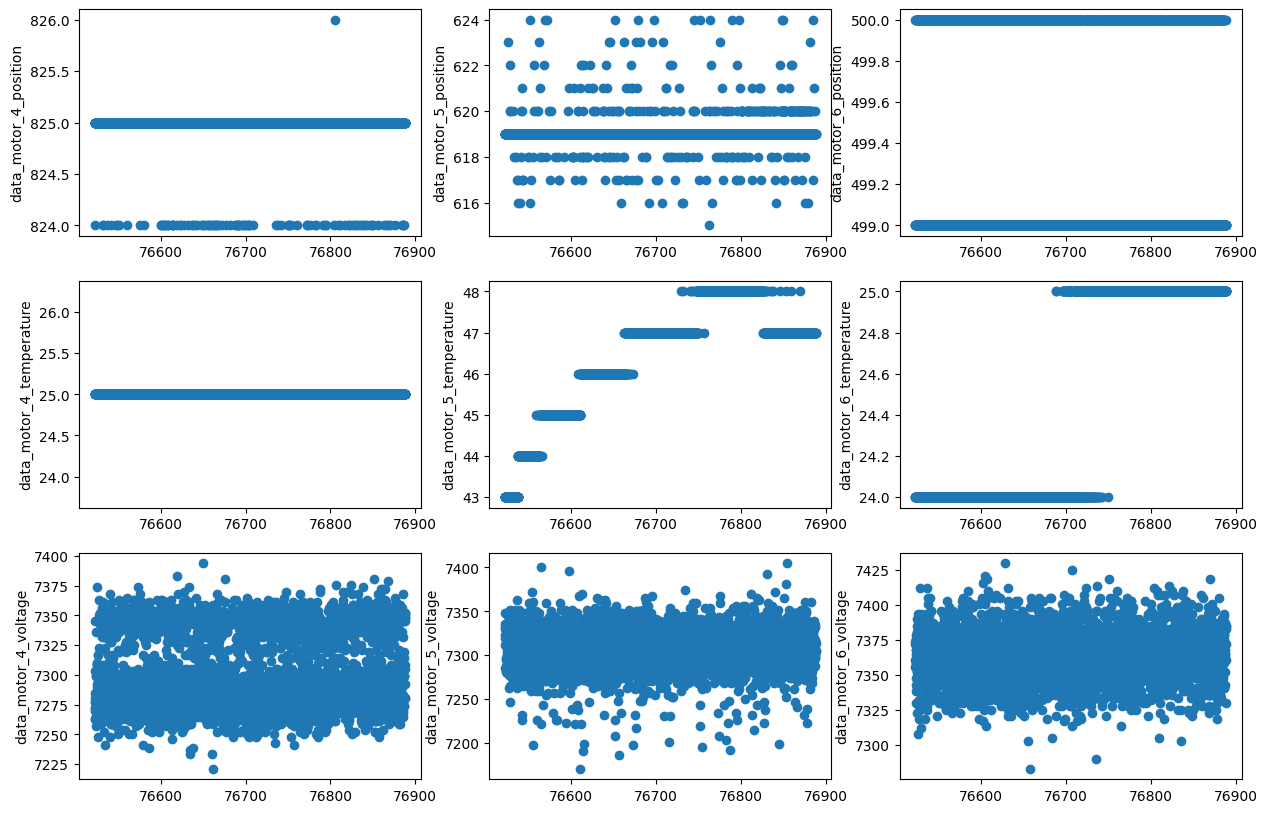

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



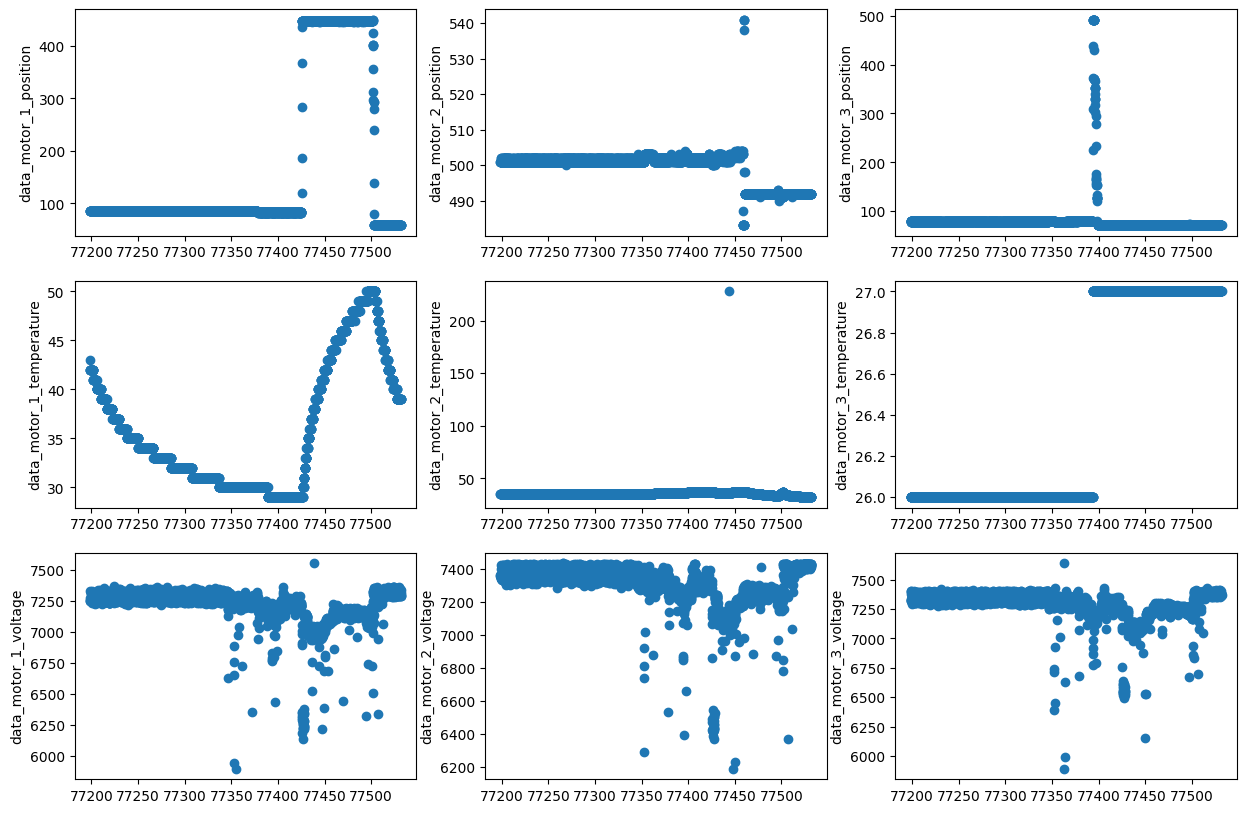

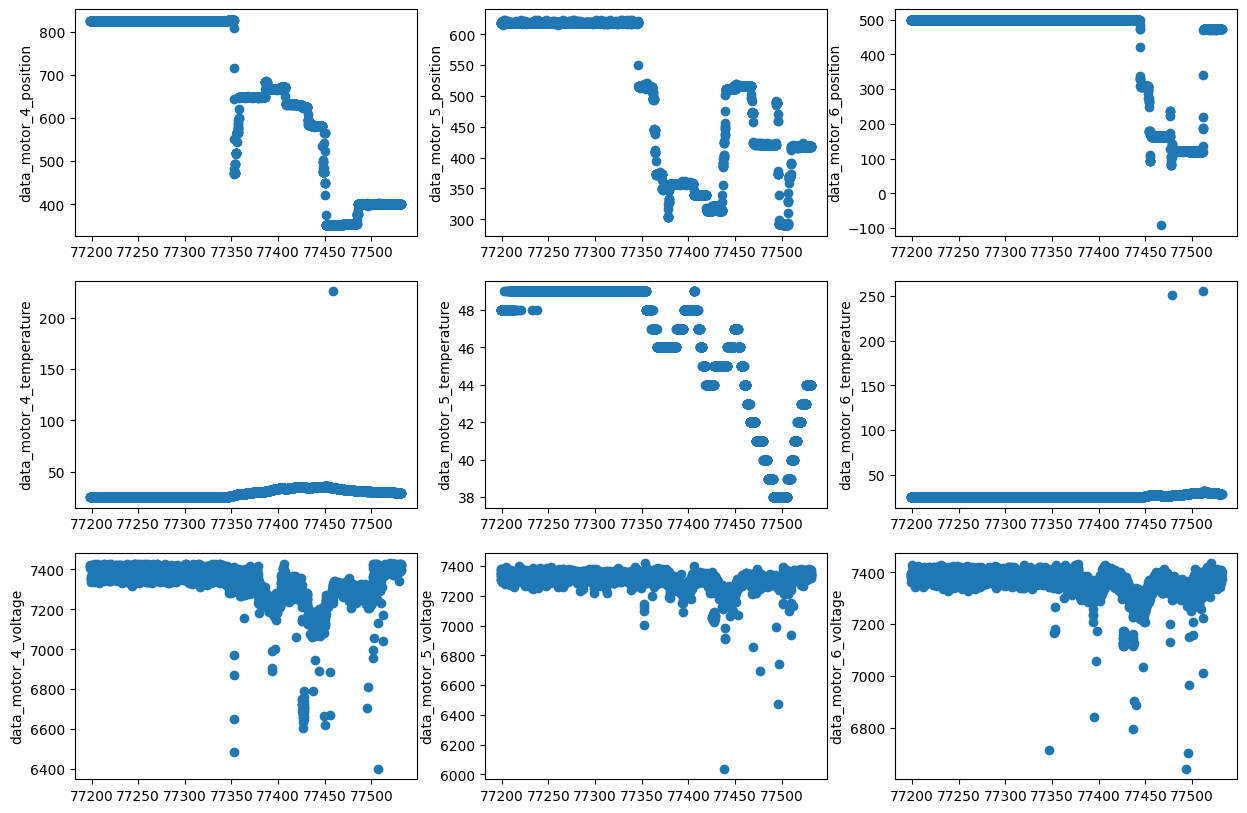

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



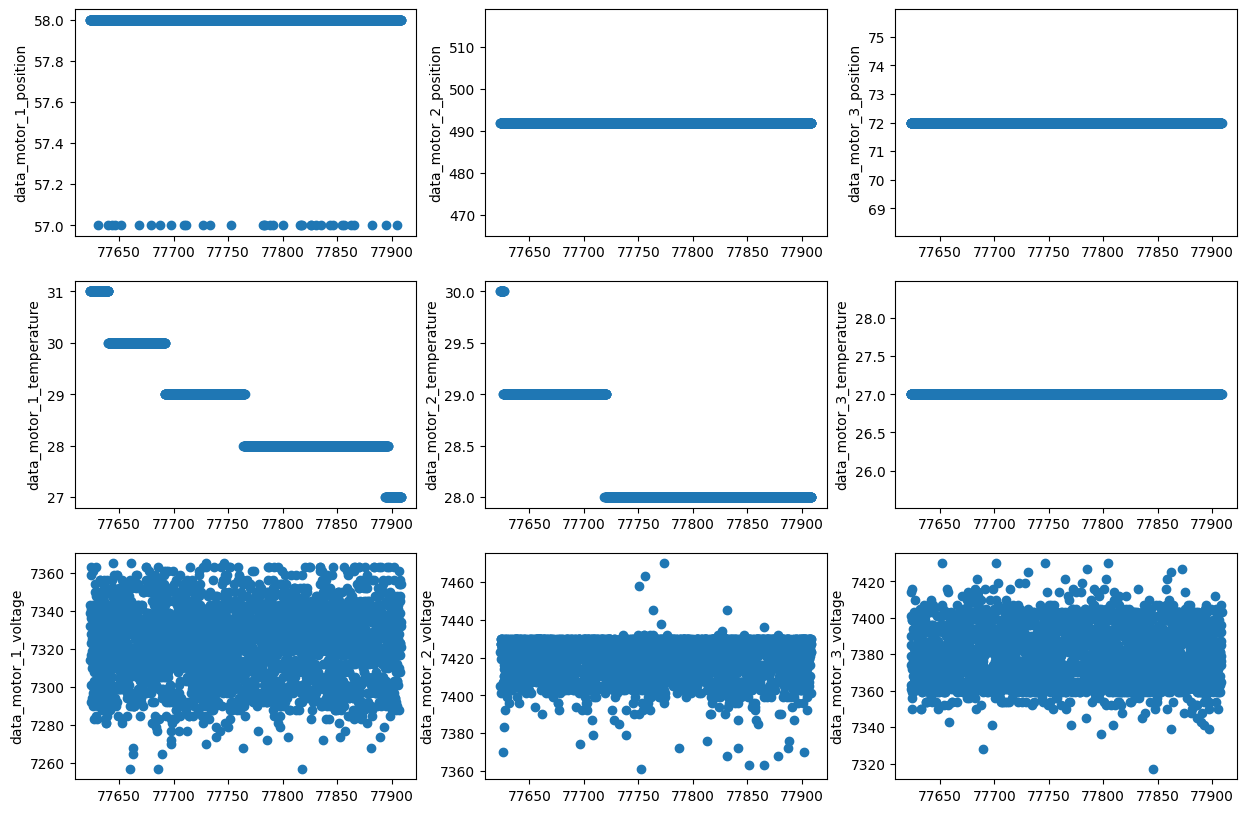

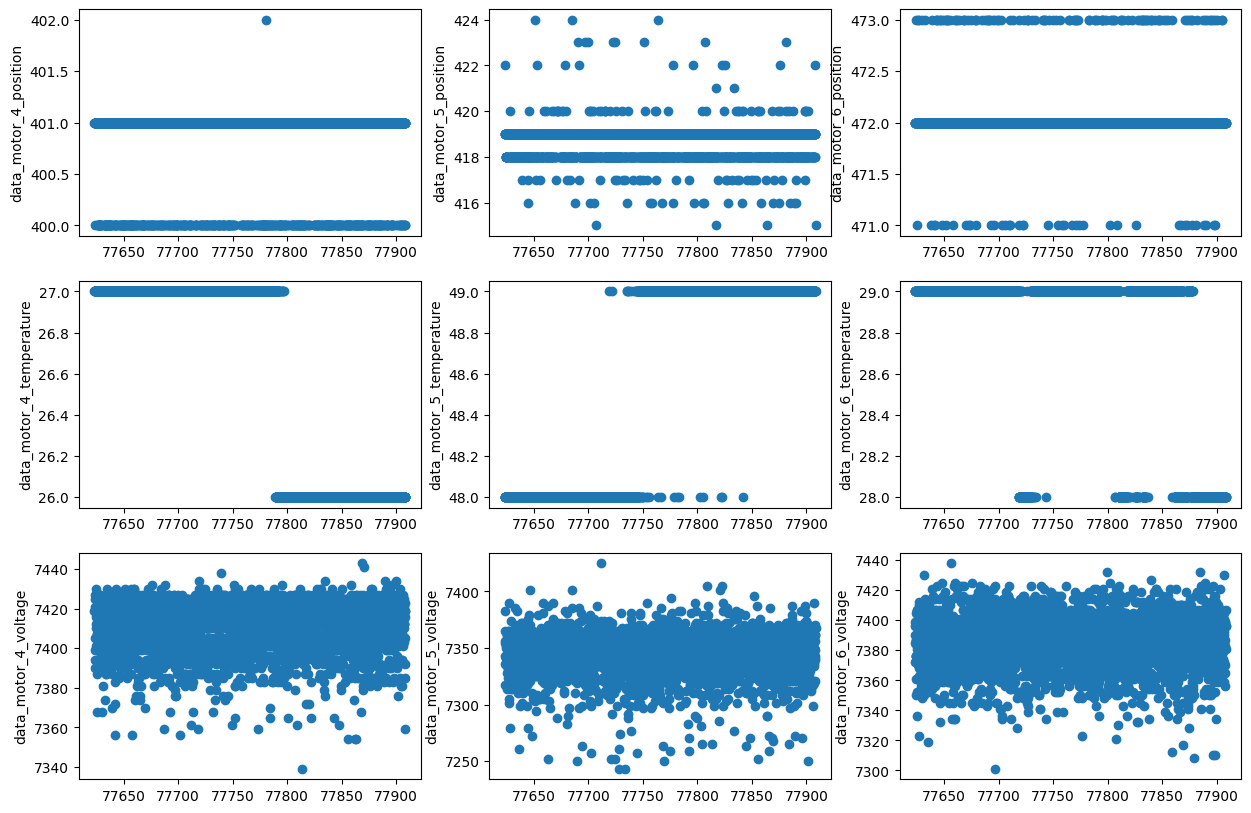

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



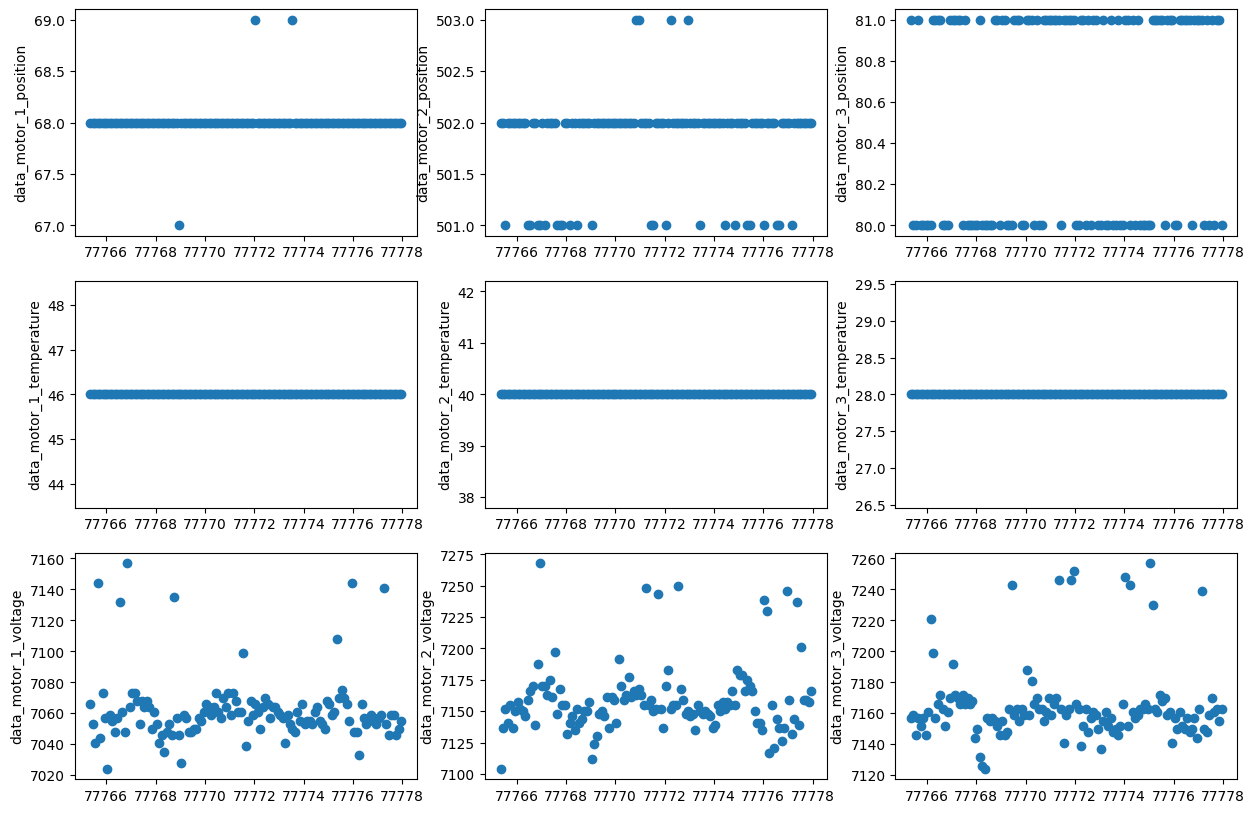

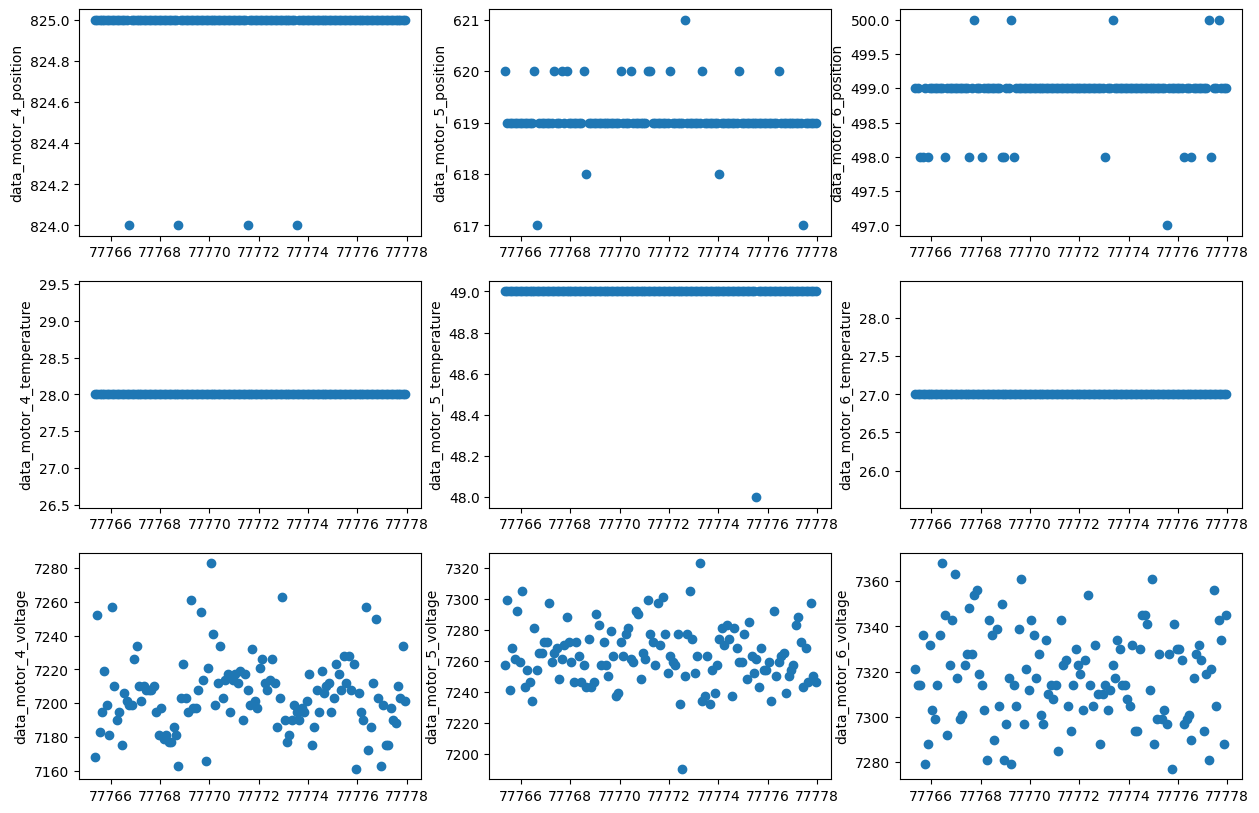

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



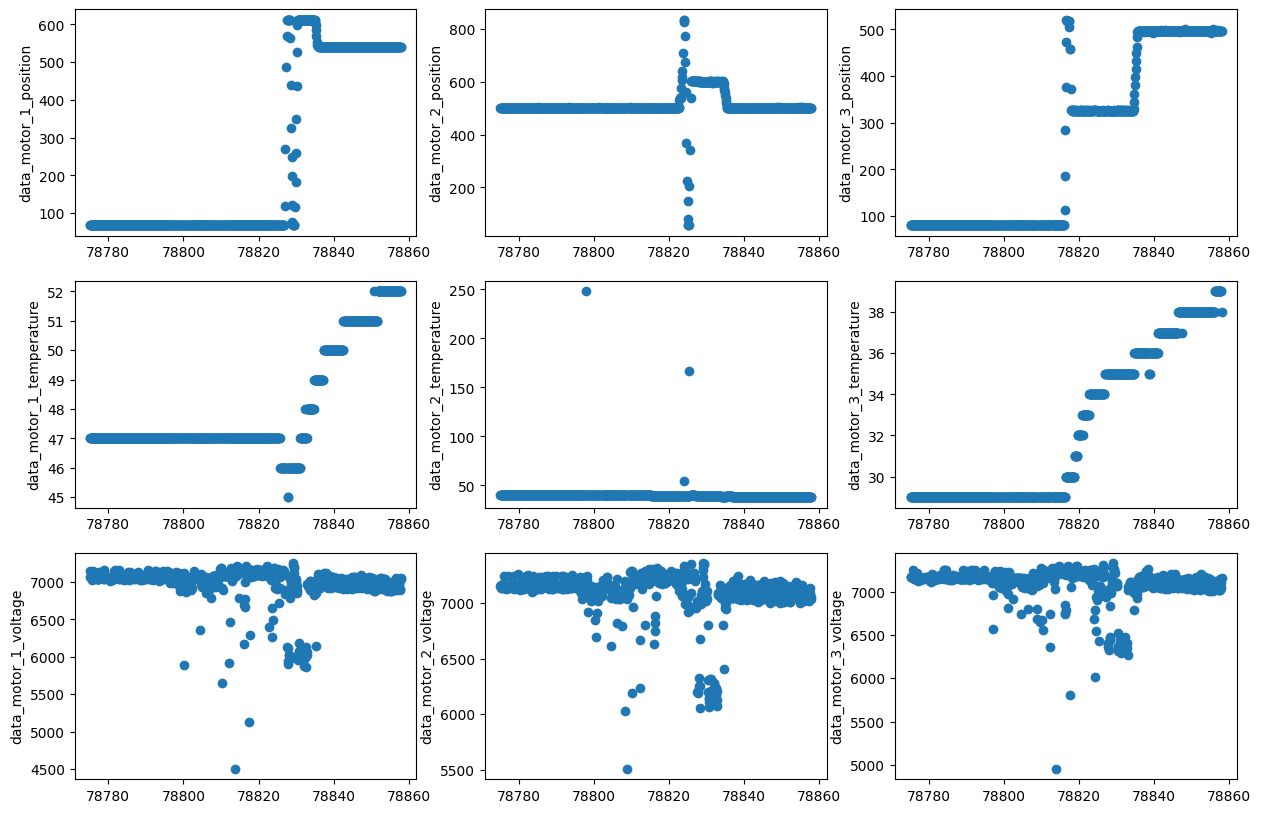

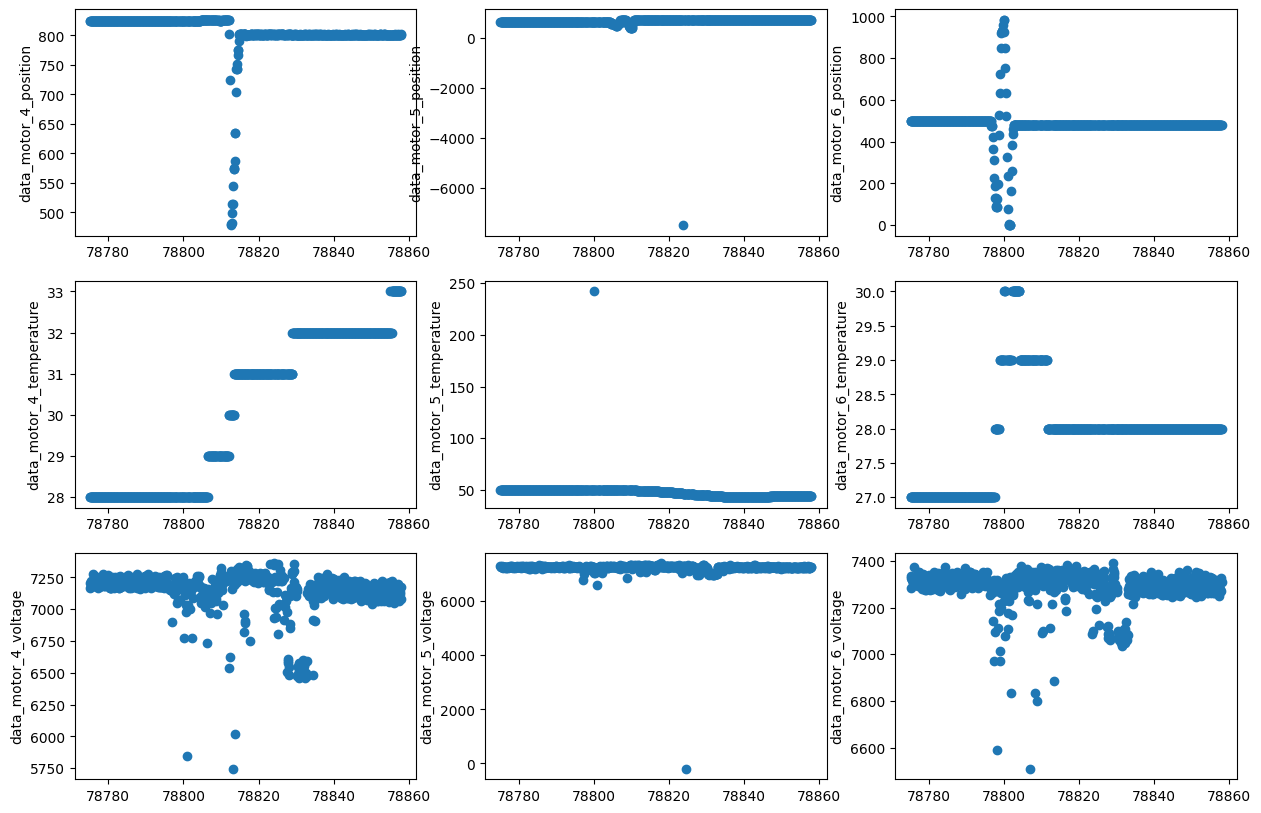

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



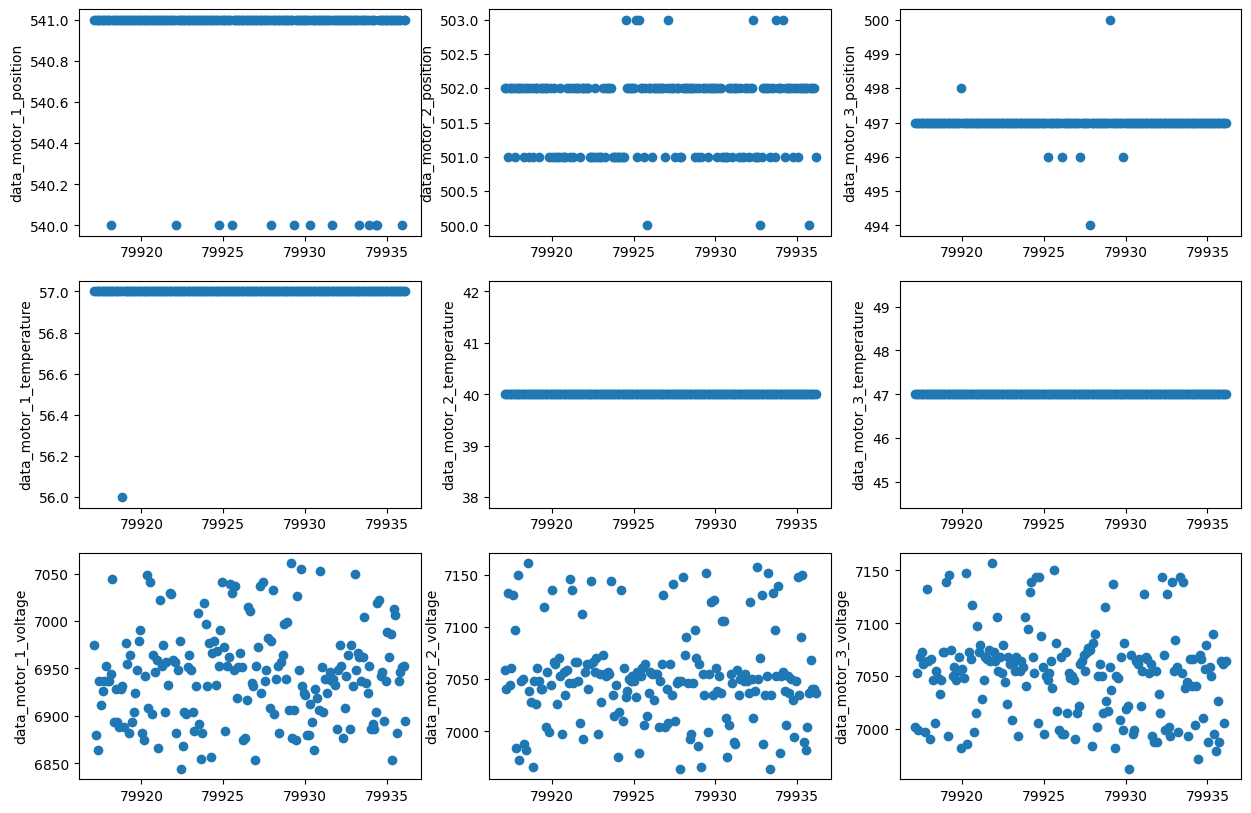

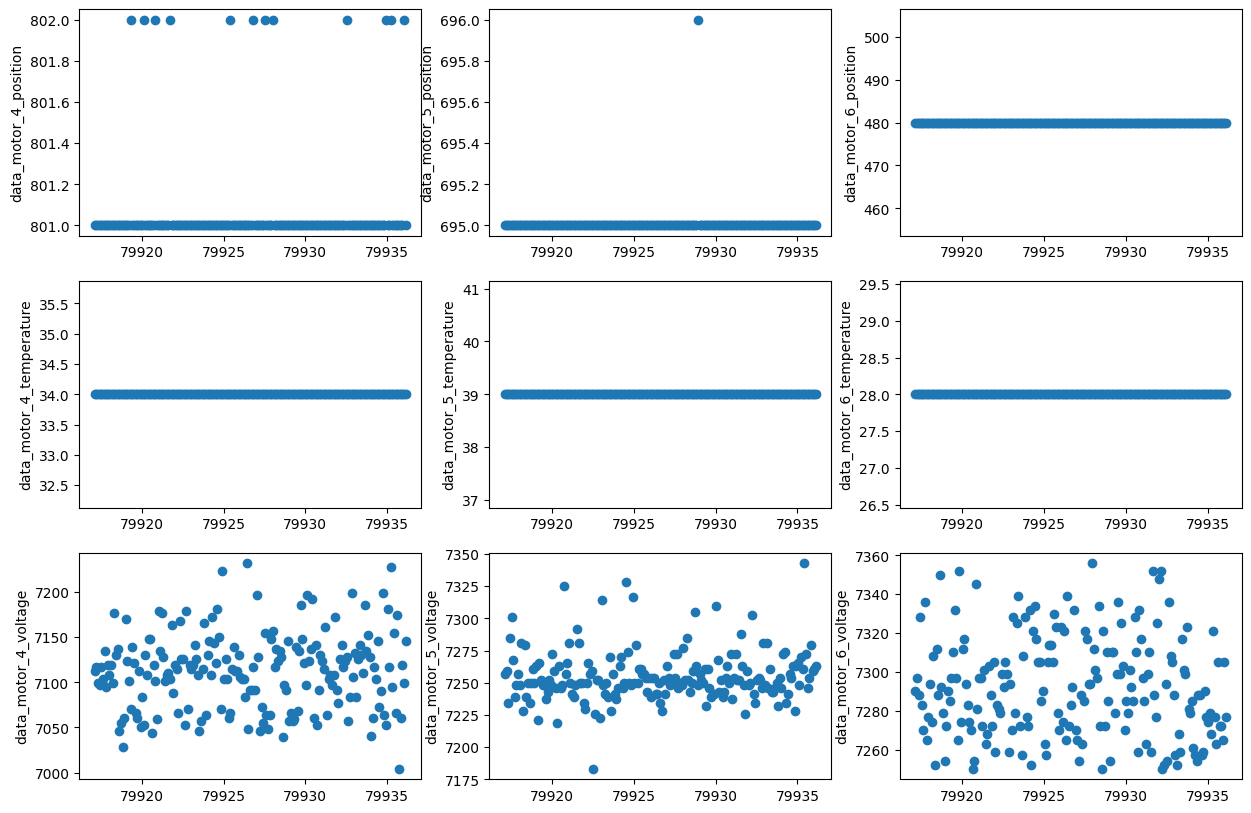

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



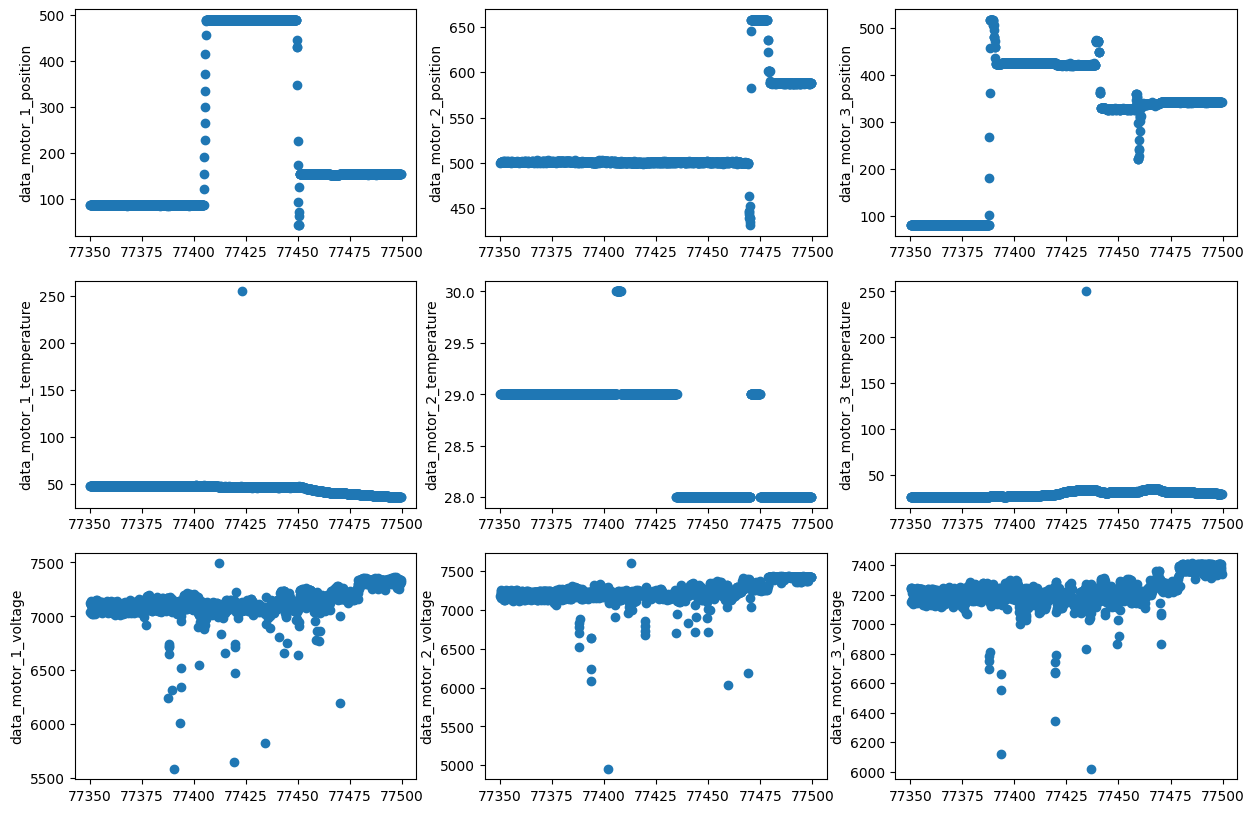

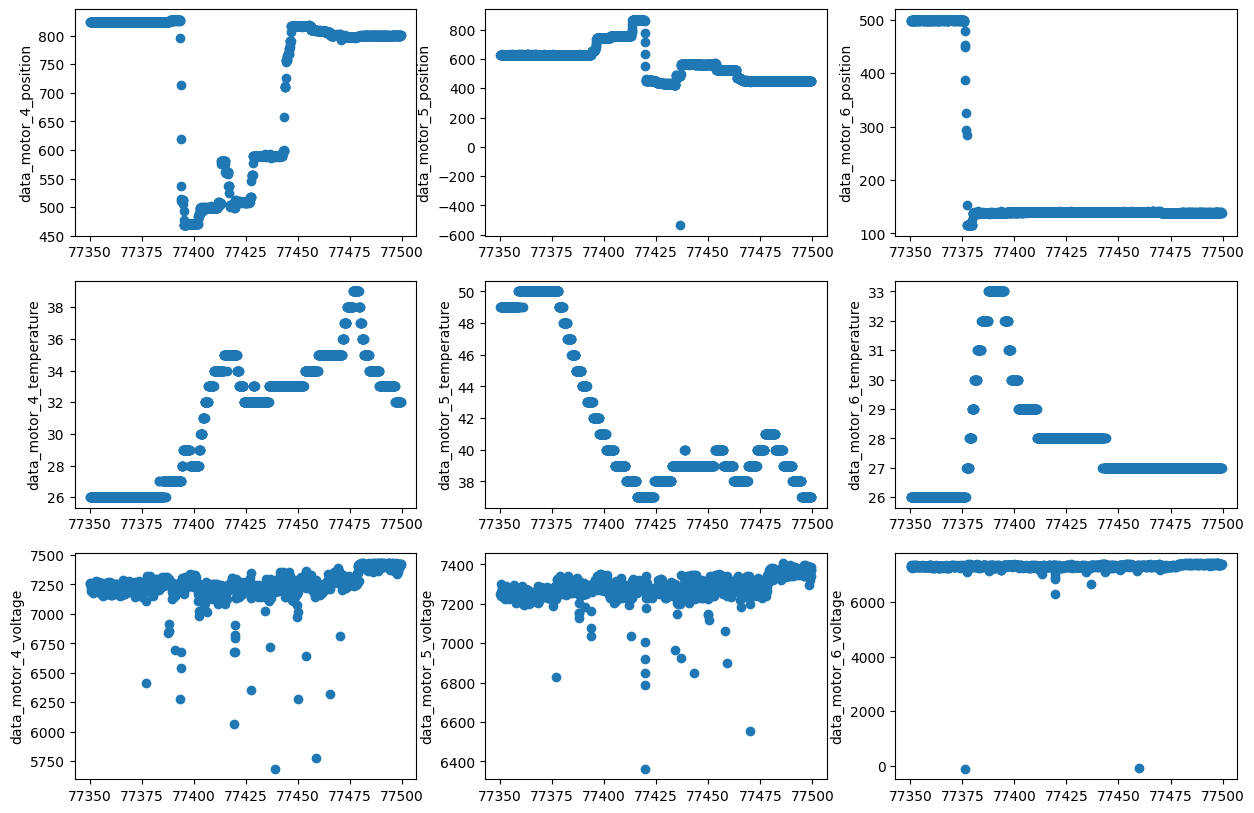

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



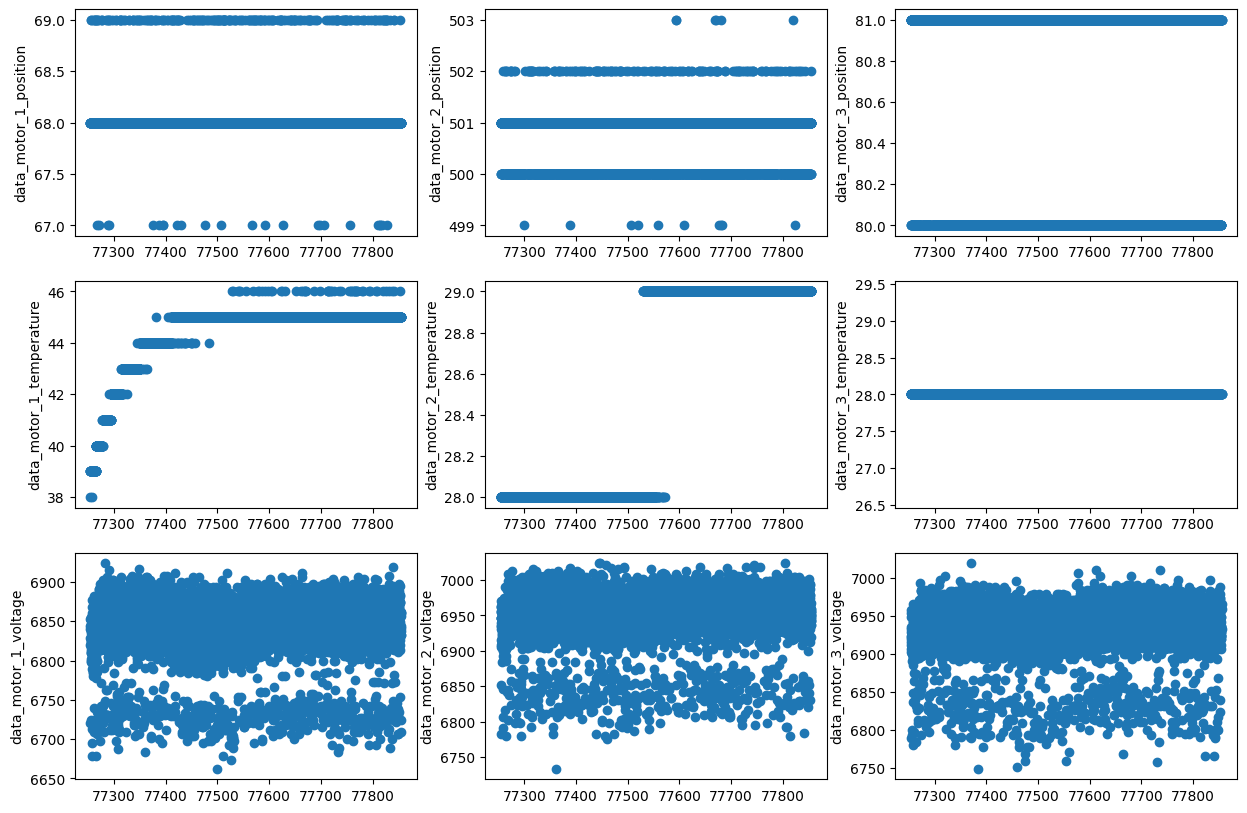

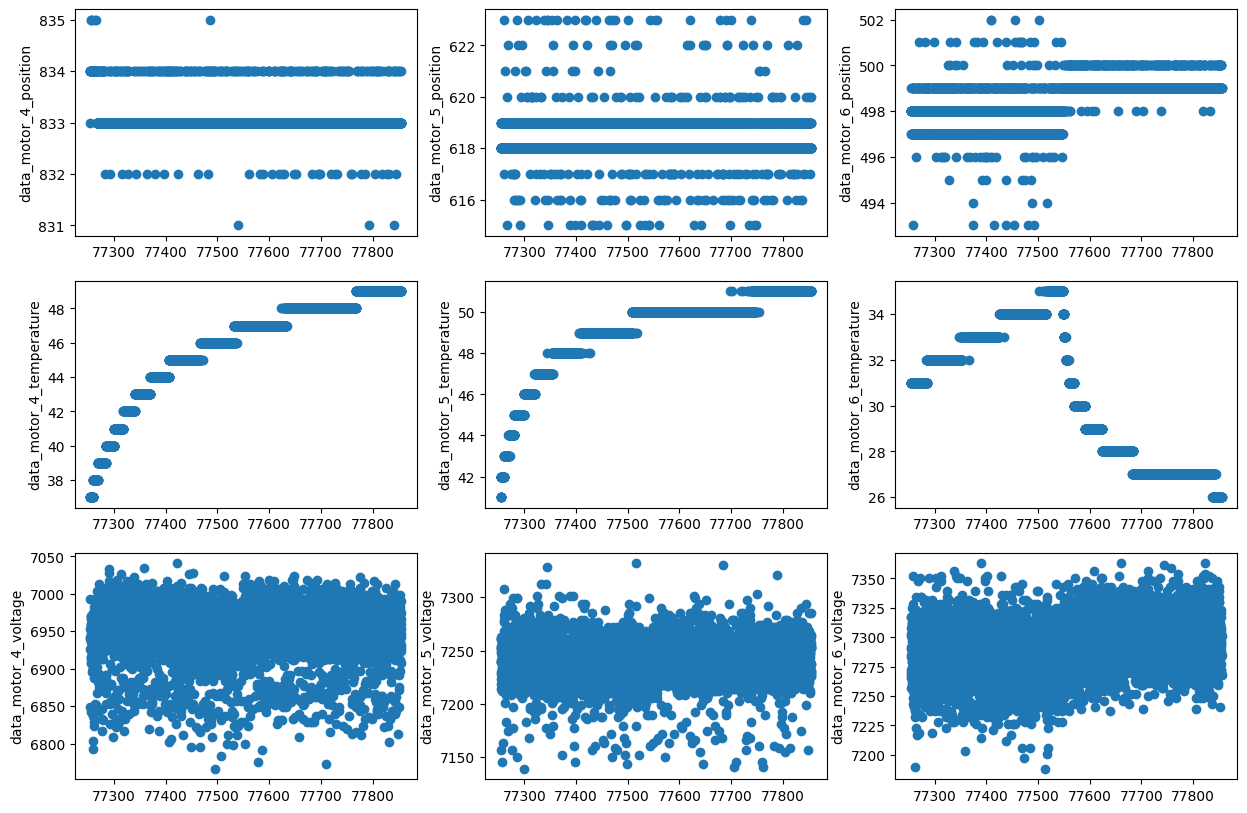

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



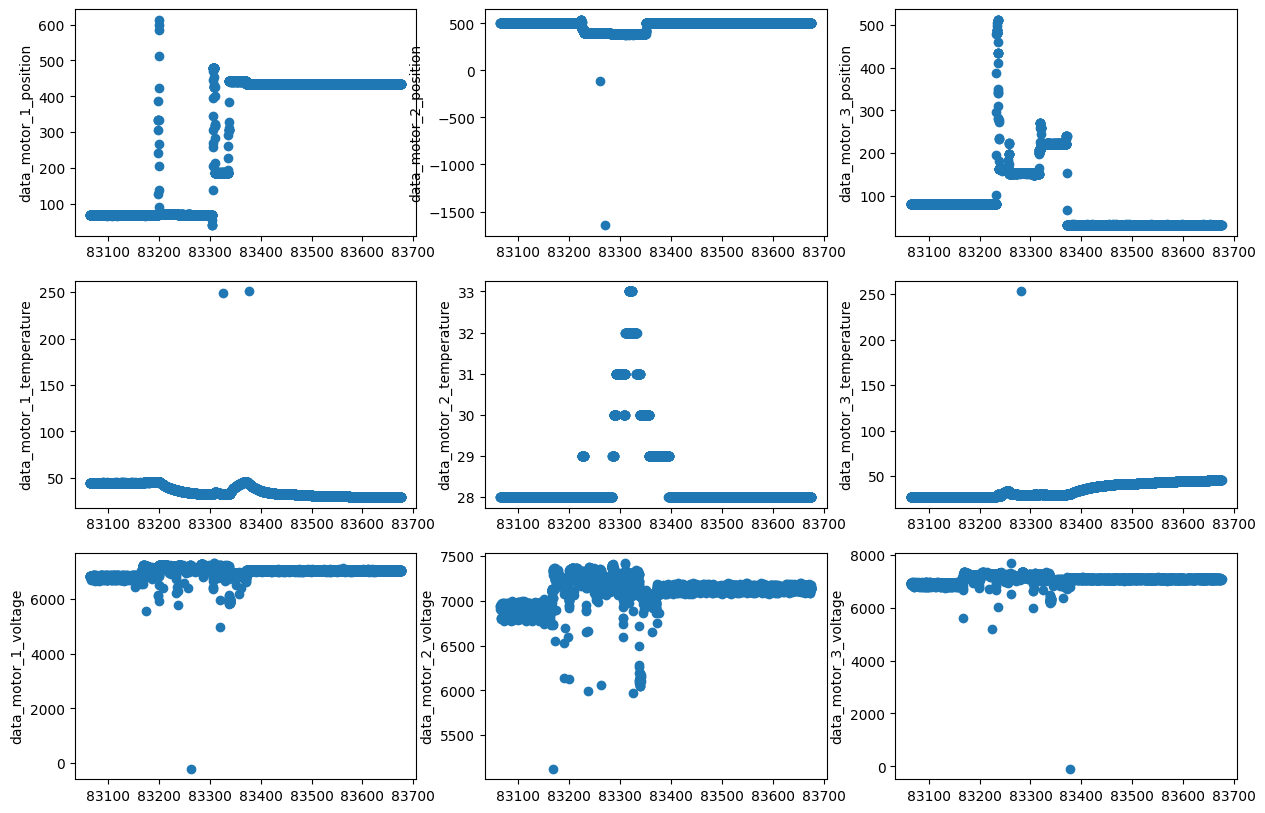

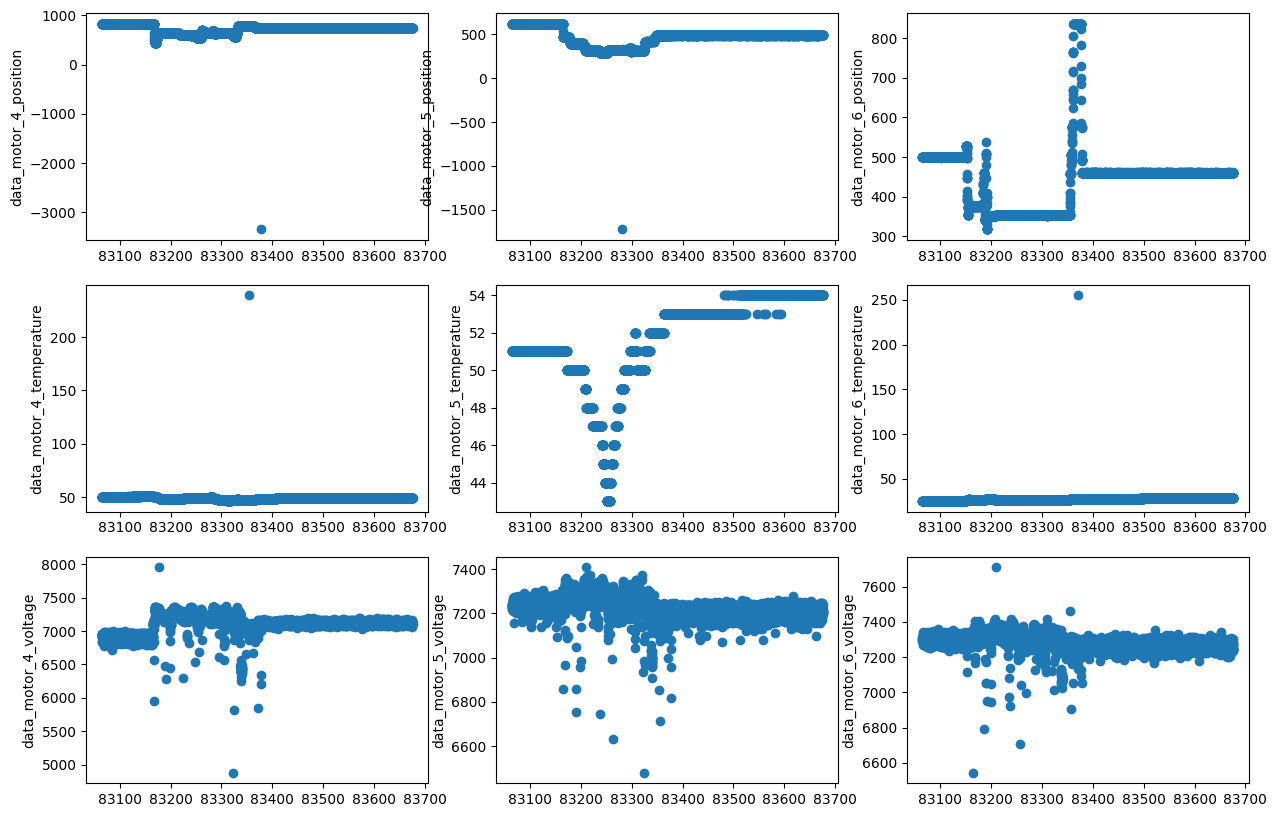

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



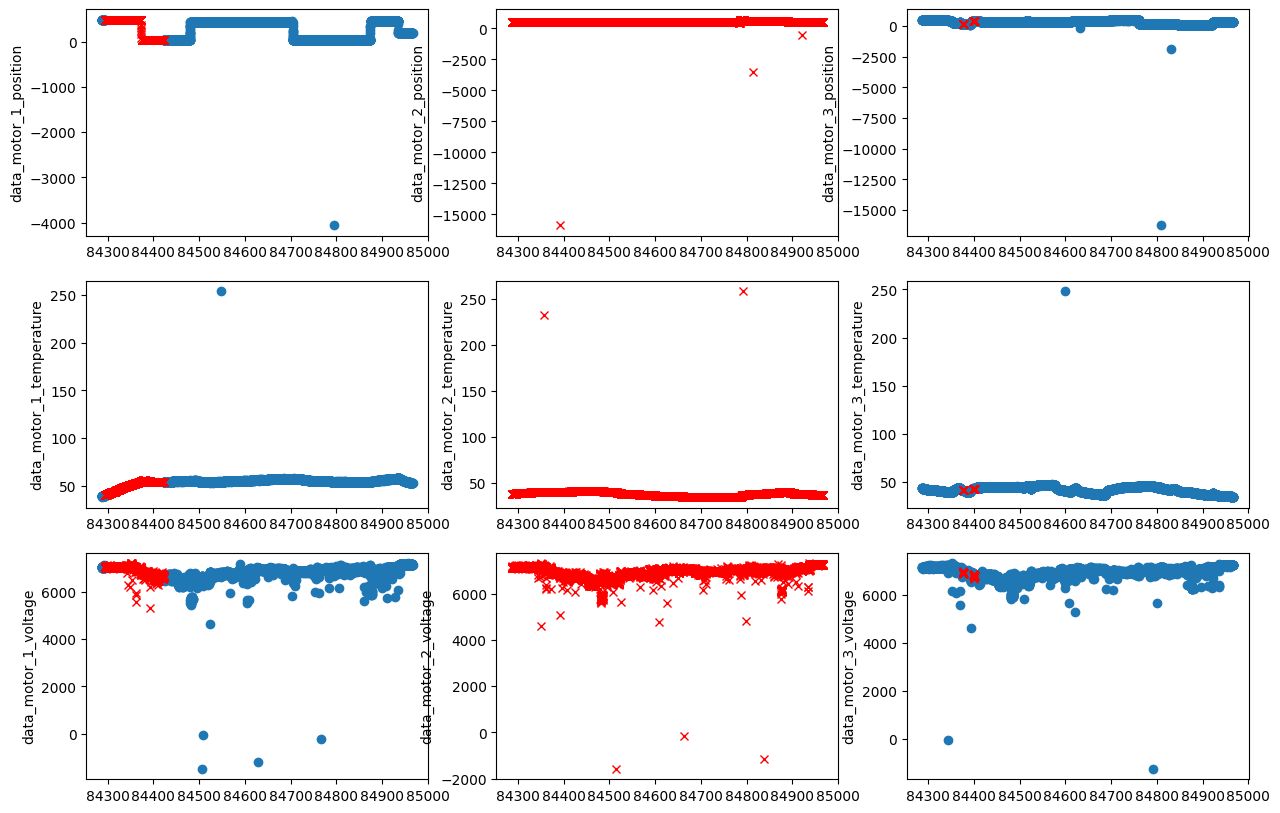

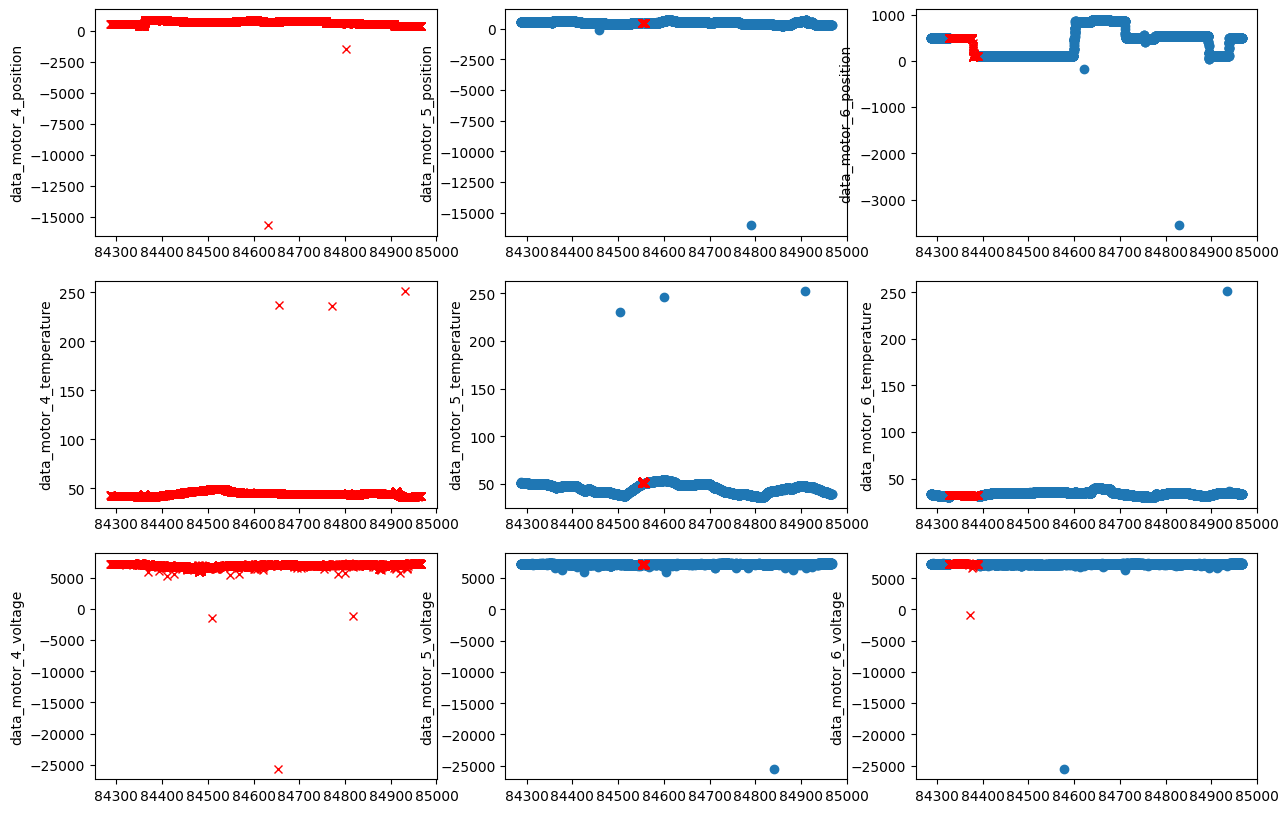

time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86                        42   
3      76522.325432                     86                        42   
4      76522.425451                     86                        42   
...             ...                    ...                       ...   
31130  84966.426470                    195                        53   
31131  84966.526530                    195                        53   
31132  84966.626610                    195                        53   
31133  84966.726460                    195                        53   
31134  84966.826470                    195                        53   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                      7223                   0                    501   
1                      7214                   0                    502   
2                      7137                   0                    501   
3                      7135                   0                    501   
4                      7212                   0                    502   
...                     ...                 ...                    ...   
31130                  7161                   0                    482   
31131                  7155                   0                    482   
31132                  7155                   0                    482   
31133                  7163                   0                    482   
31134                  7141                   0                    482   

       data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                            31                  7334                   0   
1                            31                  7250                   0   
2                            31                  7234                   0   
3                            31                  7250                   0   
4                            31                  7232                   0   
...                         ...                   ...                 ...   
31130                        36                  7265                   1   
31131                        36                  7239                   1   
31132                        36                  7246                   1   
31133                        36                  7274                   1   
31134                        36                  7261                   1   

       data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                         80  ...                   0                    619   
1                         80  ...                   0                    619   
2                         79  ...                   0                    619   
3                         79  ...                   0                    619   
4                         79  ...                   0                    619   
...                      ...  ...                 ...                    ...   
31130                    327  ...                   1                    286   
31131                    328  ...                   1                    287   
31132                    328  ...                   1                    287   
31133                    328  ...                   1                    286   
31134                    328  ...                   1                    287   

       data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                            43                  7312                   0   
1                            43                  7332                   0   
2                            43                  7330                   0   
3                            43                  7319              

In [8]:
base_dictionary = '../../dataset/training_data/'
#dictionary_name = '20240105_164214'
#path = base_dictionary + dictionary_name
df_data = read_all_test_data_from_path(base_dictionary)
df_data

Please explain the structure (what does each column represent) of the resulted dataframe here.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

1) We can see some noises in the features : for example in voltage we have klarge spike over tiny period. So we need to smooth the data.
2) The features each have different value of average. We need to scale from 0 to 1 to be able to compare them.
3) We have some outliers in each feature, we need to remove them because their value is completely different from the rest of the point.
4) We don't have a lot of missing values so filling them isn't recquired.
5) It's hard to detect any patterns regarding the temperature, due the outliers make it the scale of the graph too big. We can still see that it's stay relatively close to the same value.
6) If we compare normal data with failures we could see that failure have a spike of temperature in the shape of a triangle. Failure data is also higher than normal temperature.





## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

In [9]:
%matplotlib inline

In [10]:
df_data.columns

Index(['time', 'data_motor_1_position', 'data_motor_1_temperature',
       'data_motor_1_voltage', 'data_motor_1_label', 'data_motor_2_position',
       'data_motor_2_temperature', 'data_motor_2_voltage',
       'data_motor_2_label', 'data_motor_3_position',
       'data_motor_3_temperature', 'data_motor_3_voltage',
       'data_motor_3_label', 'data_motor_4_position',
       'data_motor_4_temperature', 'data_motor_4_voltage',
       'data_motor_4_label', 'data_motor_5_position',
       'data_motor_5_temperature', 'data_motor_5_voltage',
       'data_motor_5_label', 'data_motor_6_position',
       'data_motor_6_temperature', 'data_motor_6_voltage',
       'data_motor_6_label', 'test_condition'],
      dtype='object')

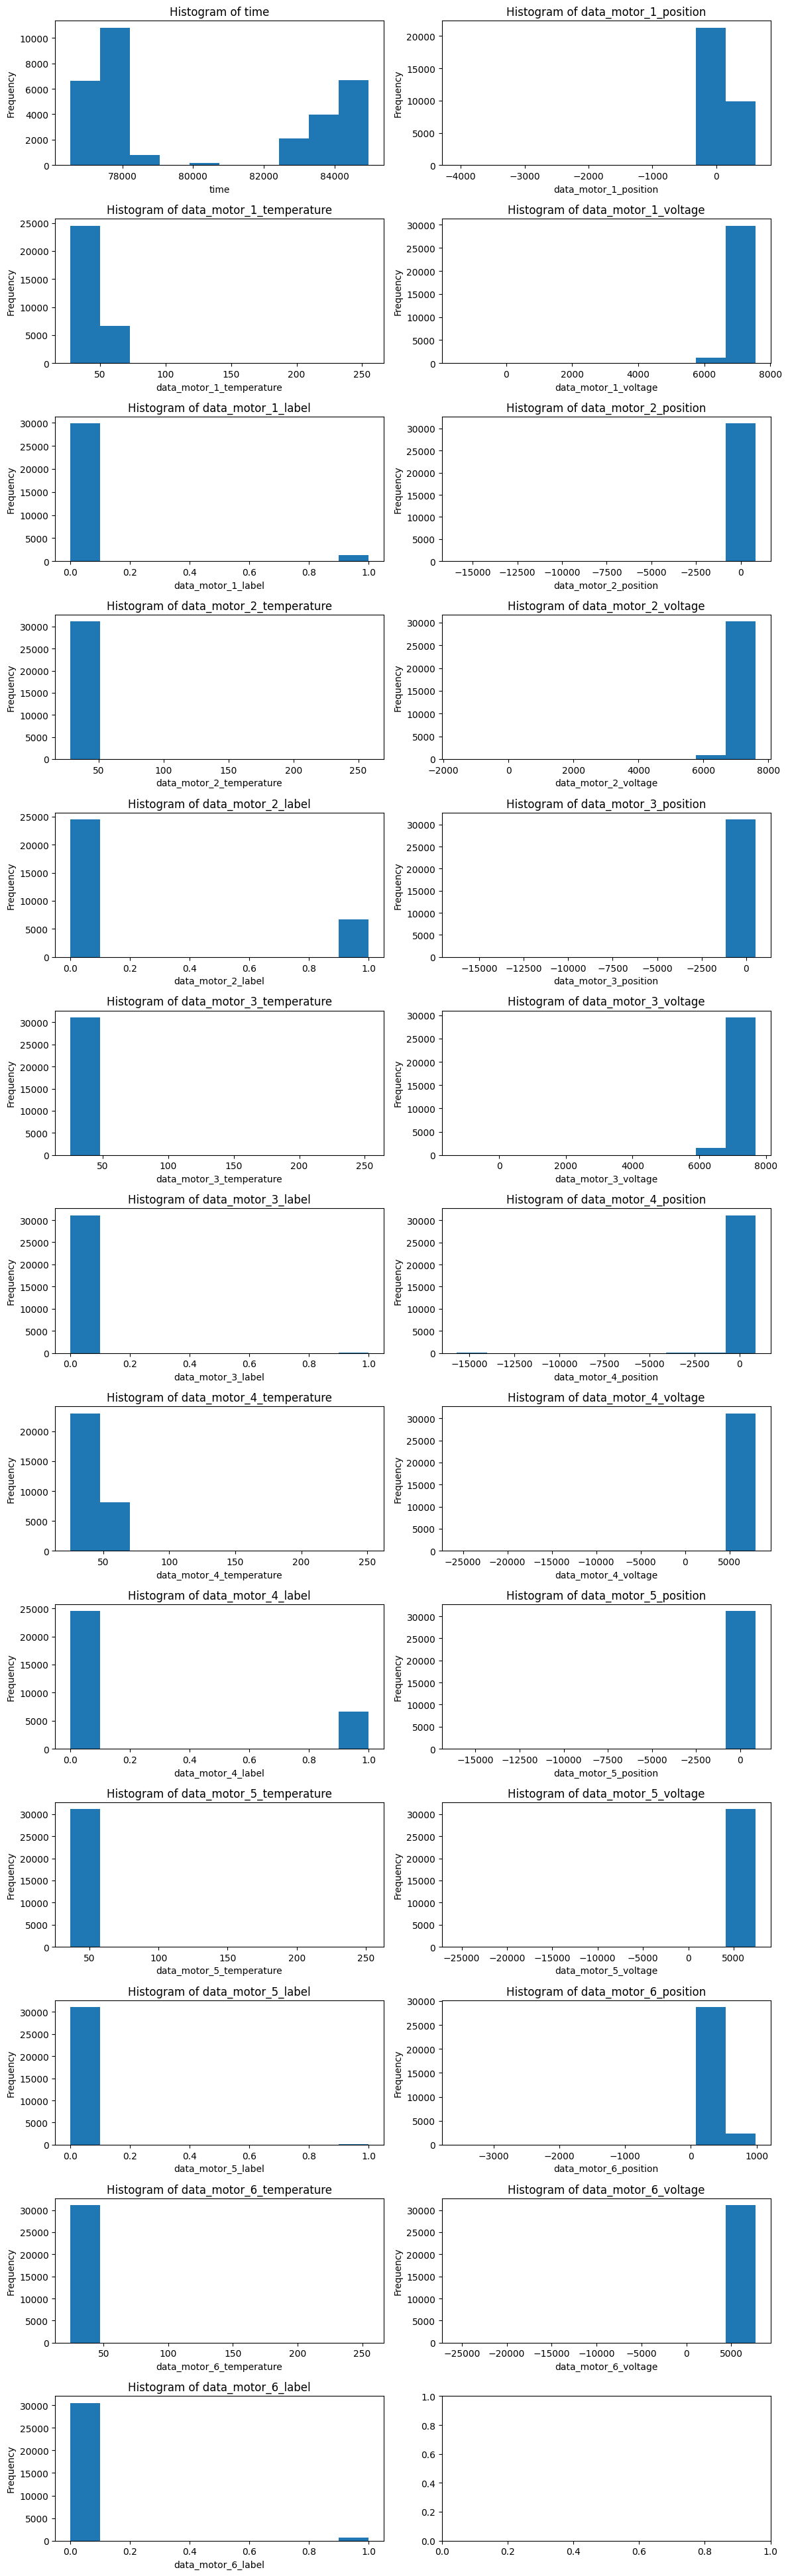

In [11]:
import matplotlib.pyplot as plt

num_cols = len(df_data.columns)
num_rows = (num_cols + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))

axes = axes.flatten()

for i, column in enumerate(df_data.columns):
    if column=="test_condition" : continue
    ax = axes[i]
    ax.hist(df_data[column], bins=10)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


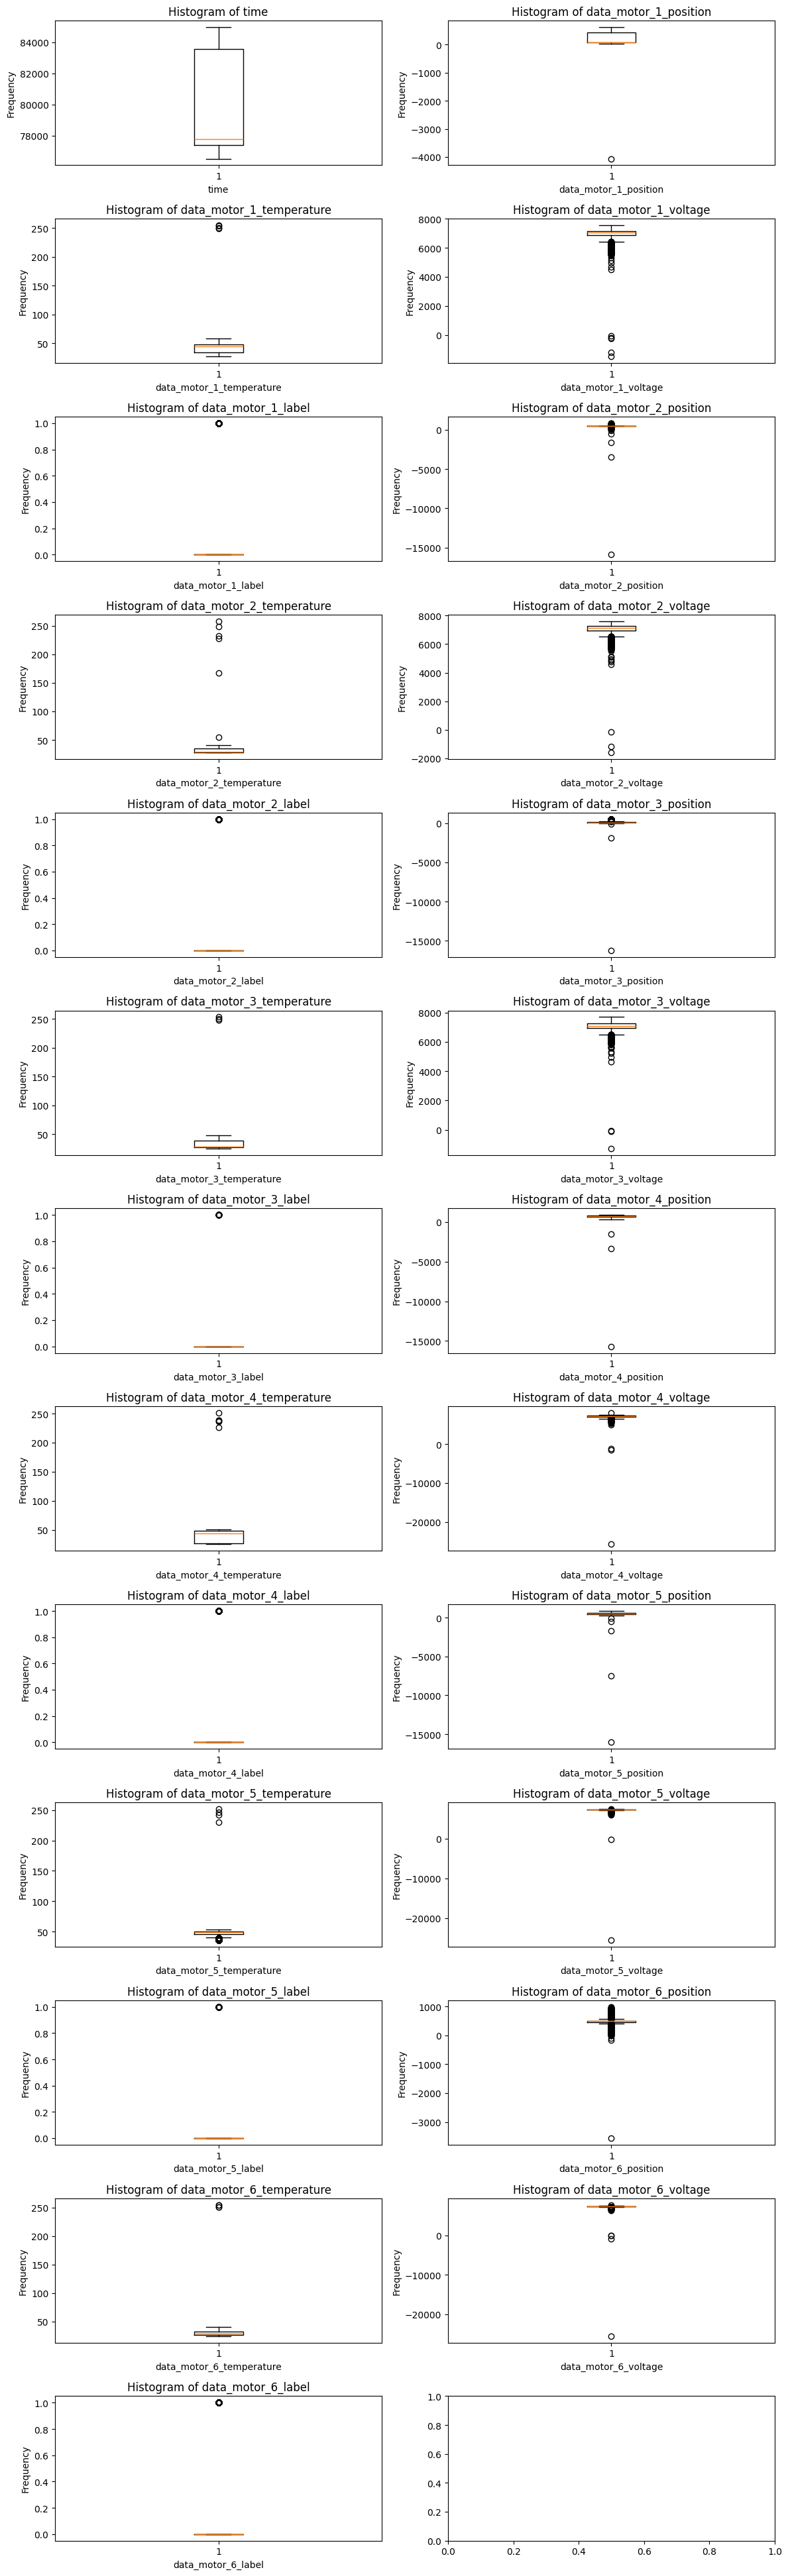

In [12]:
num_cols = len(df_data.columns)
num_rows = (num_cols + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))

axes = axes.flatten()

for i, column in enumerate(df_data.columns):
    if column=="test_condition" : continue
    ax = axes[i]
    ax.boxplot(df_data[column])  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

In [13]:
df_data

time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86                        42   
3      76522.325432                     86                        42   
4      76522.425451                     86                        42   
...             ...                    ...                       ...   
31130  84966.426470                    195                        53   
31131  84966.526530                    195                        53   
31132  84966.626610                    195                        53   
31133  84966.726460                    195                        53   
31134  84966.826470                    195                        53   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                      7223                   0                    501   
1                      7214                   0                    502   
2                      7137                   0                    501   
3                      7135                   0                    501   
4                      7212                   0                    502   
...                     ...                 ...                    ...   
31130                  7161                   0                    482   
31131                  7155                   0                    482   
31132                  7155                   0                    482   
31133                  7163                   0                    482   
31134                  7141                   0                    482   

       data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                            31                  7334                   0   
1                            31                  7250                   0   
2                            31                  7234                   0   
3                            31                  7250                   0   
4                            31                  7232                   0   
...                         ...                   ...                 ...   
31130                        36                  7265                   1   
31131                        36                  7239                   1   
31132                        36                  7246                   1   
31133                        36                  7274                   1   
31134                        36                  7261                   1   

       data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                         80  ...                   0                    619   
1                         80  ...                   0                    619   
2                         79  ...                   0                    619   
3                         79  ...                   0                    619   
4                         79  ...                   0                    619   
...                      ...  ...                 ...                    ...   
31130                    327  ...                   1                    286   
31131                    328  ...                   1                    287   
31132                    328  ...                   1                    287   
31133                    328  ...                   1                    286   
31134                    328  ...                   1                    287   

       data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                            43                  7312                   0   
1                            43                  7332                   0   
2                            43                  7330                   0   
3                            43                  7319              

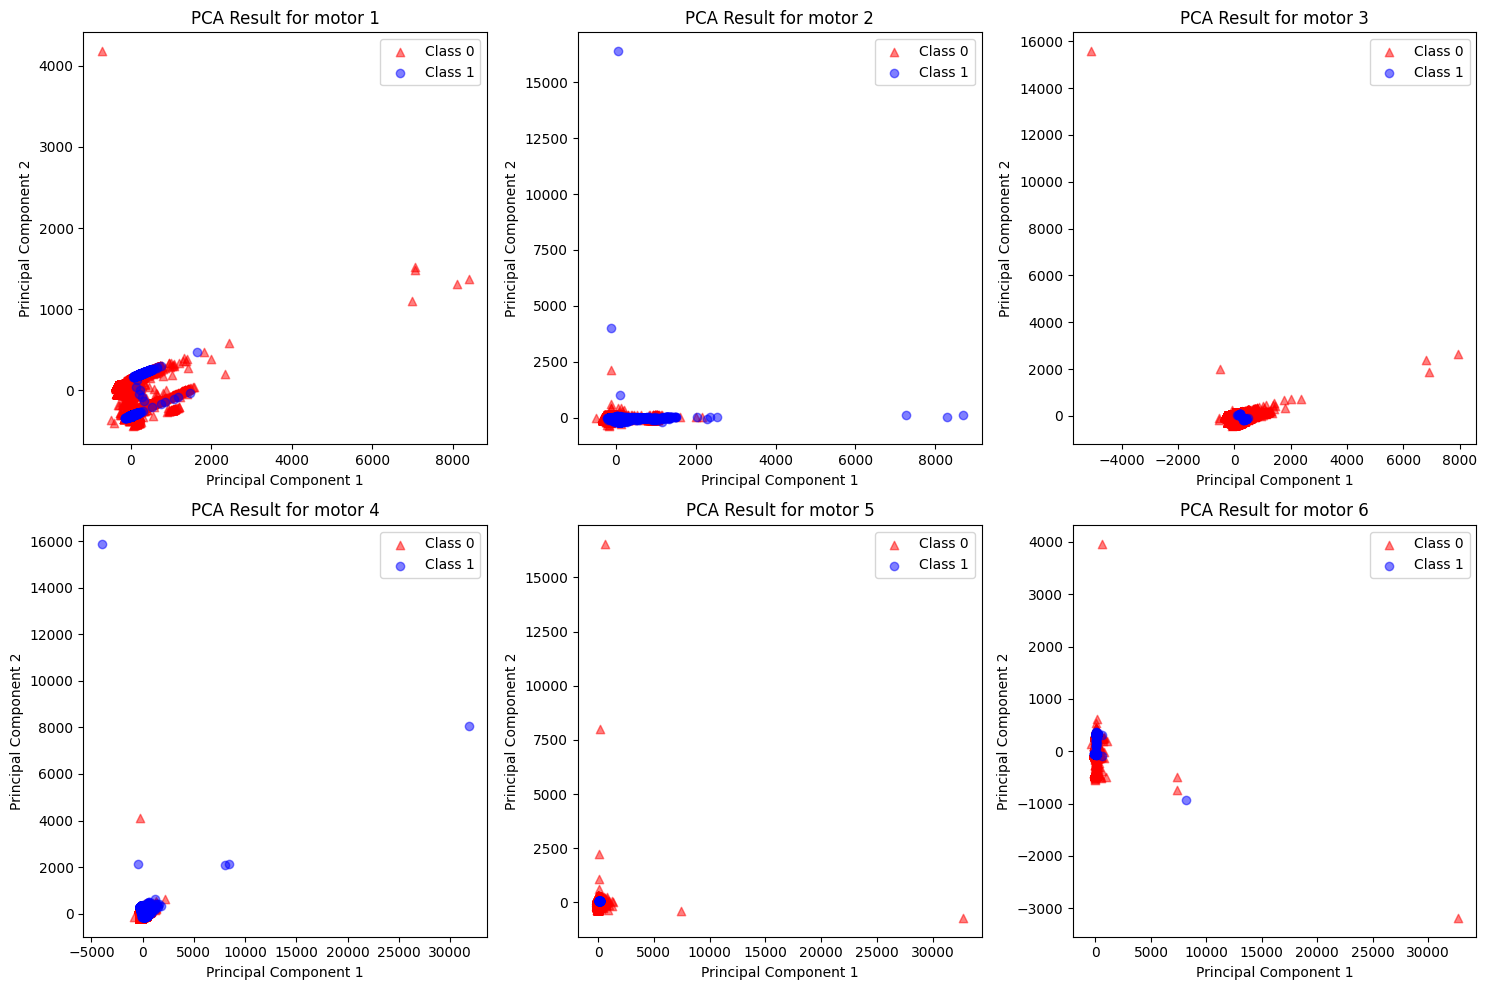

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < 6:  # Limit the number of iterations to the number of subplots
        X = df_data[df_data.columns[i * 4 + 1:i * 4 + 4]]
        y = df_data[df_data.columns[i * 4 + 4]]

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
        ax.set_title(f'PCA Result for motor {i+1}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend()

plt.tight_layout()
plt.show()


We see that there are many outliers that need to be removed so that we can better visualize the data

In [83]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Separate the features (X) and the target variable (y)
# X = df_data.drop(['label', 'sequence_idx', 'time'], axis=1)
# y = df_data['label']

# # Perform PCA to reduce the dimensionality to 2 dimensions
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Plot the results
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
# plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
# plt.title('2D PCA Result')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

### Data Standardization

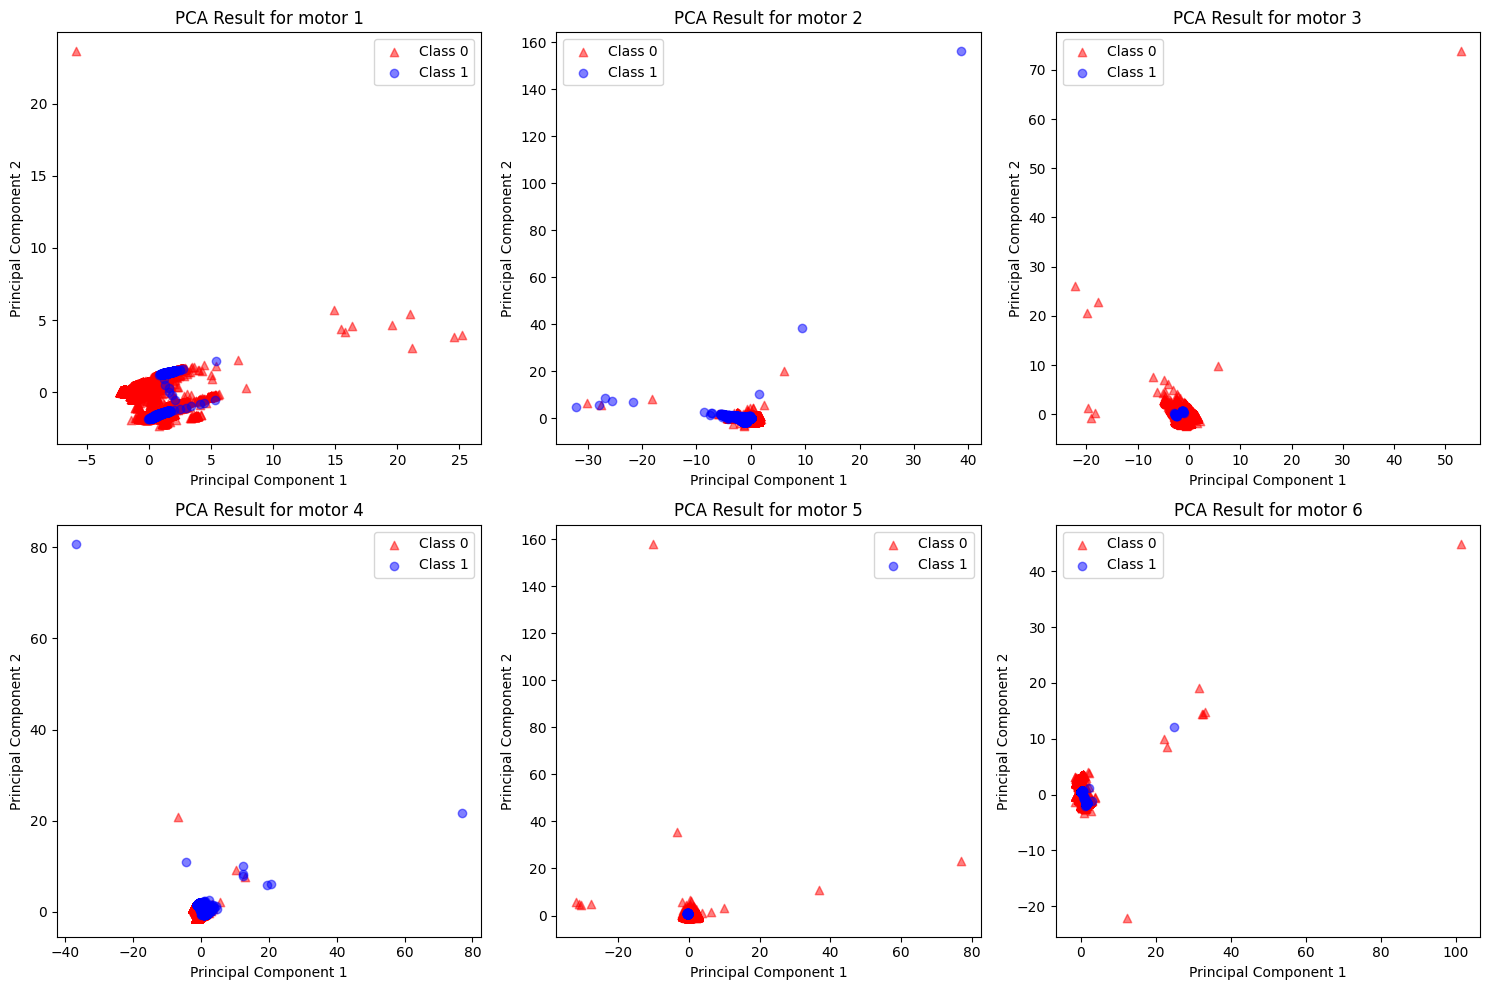

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = StandardScaler()
#X_train = scaler.fit_transform(X_train)
scaler2 = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < 6:  # Limit the number of iterations to the number of subplots
        X = df_data[df_data.columns[i * 4 + 1:i * 4 + 4]]
        y = df_data[df_data.columns[i * 4 + 4]]
        X=scaler1.fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
        ax.set_title(f'PCA Result for motor {i+1}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend()

plt.tight_layout()
plt.show()


### Data Normalization

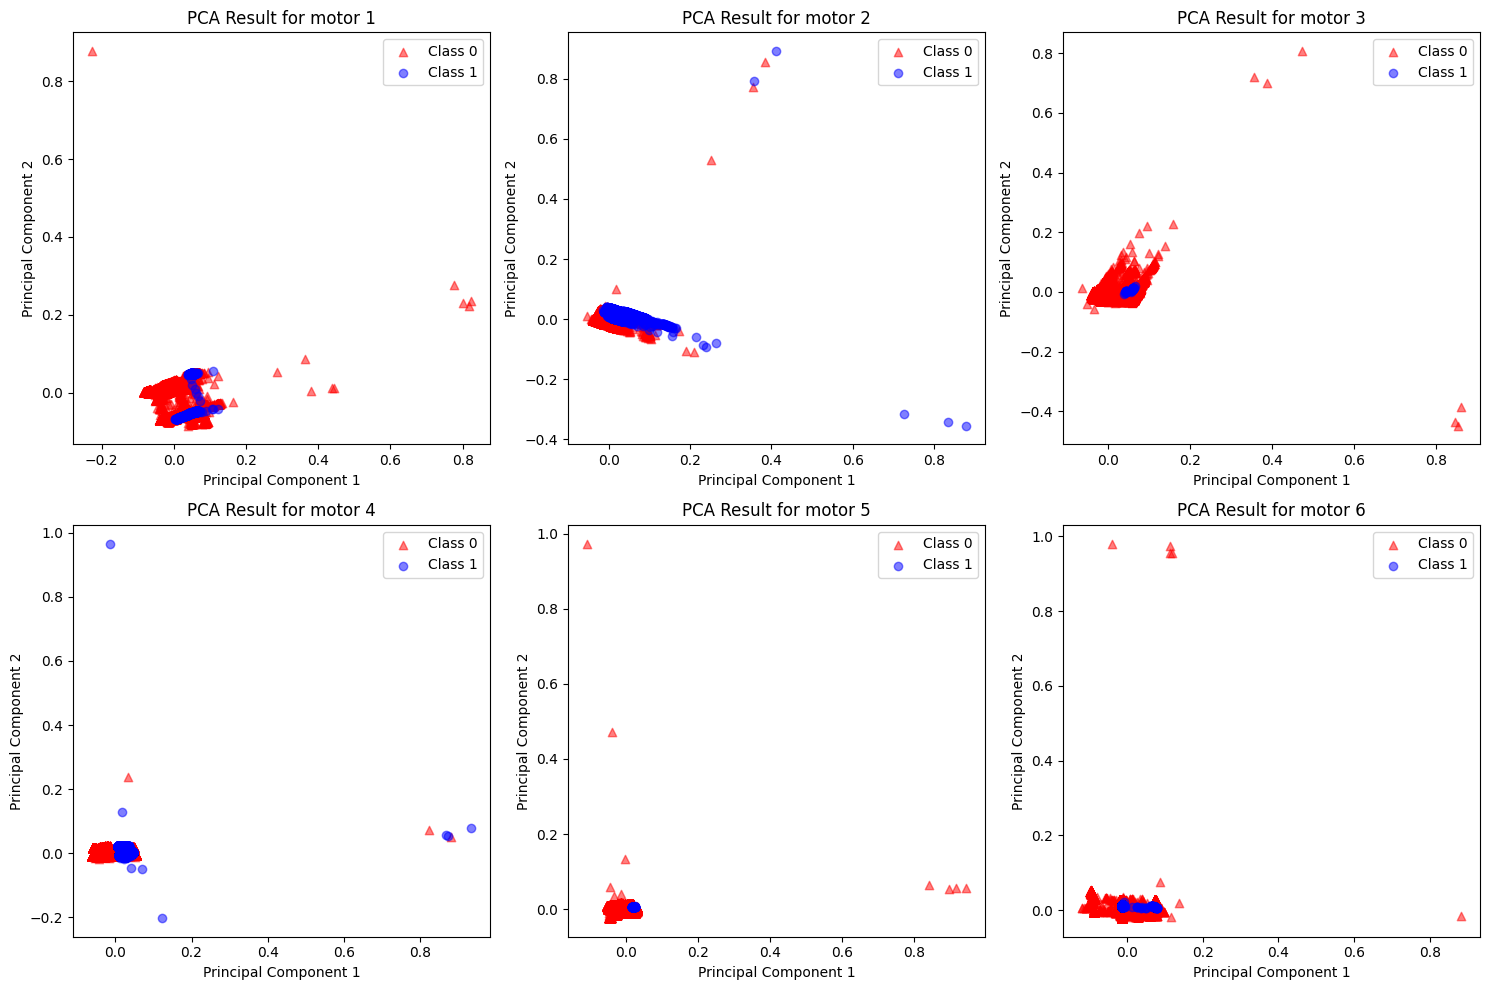

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = StandardScaler()
#X_train = scaler.fit_transform(X_train)
scaler2 = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < 6:  # Limit the number of iterations to the number of subplots
        X = df_data[df_data.columns[i * 4 + 1:i * 4 + 4]]
        y = df_data[df_data.columns[i * 4 + 4]]
        X=scaler2.fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
        ax.set_title(f'PCA Result for motor {i+1}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend()

plt.tight_layout()
plt.show()


# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

We will normalize only the columns below and use the MinMaxScaler

In [22]:
colonnes=['data_motor_1_position', 'data_motor_1_temperature',
       'data_motor_1_voltage',  'data_motor_2_position',
       'data_motor_2_temperature', 'data_motor_2_voltage',
        'data_motor_3_position',
       'data_motor_3_temperature', 'data_motor_3_voltage',
      'data_motor_4_position',
       'data_motor_4_temperature', 'data_motor_4_voltage',
        'data_motor_5_position',
       'data_motor_5_temperature', 'data_motor_5_voltage',
        'data_motor_6_position',
       'data_motor_6_temperature', 'data_motor_6_voltage']
normalized_data = scaler2.fit_transform(df_data[colonnes])
df_data[colonnes]=normalized_data


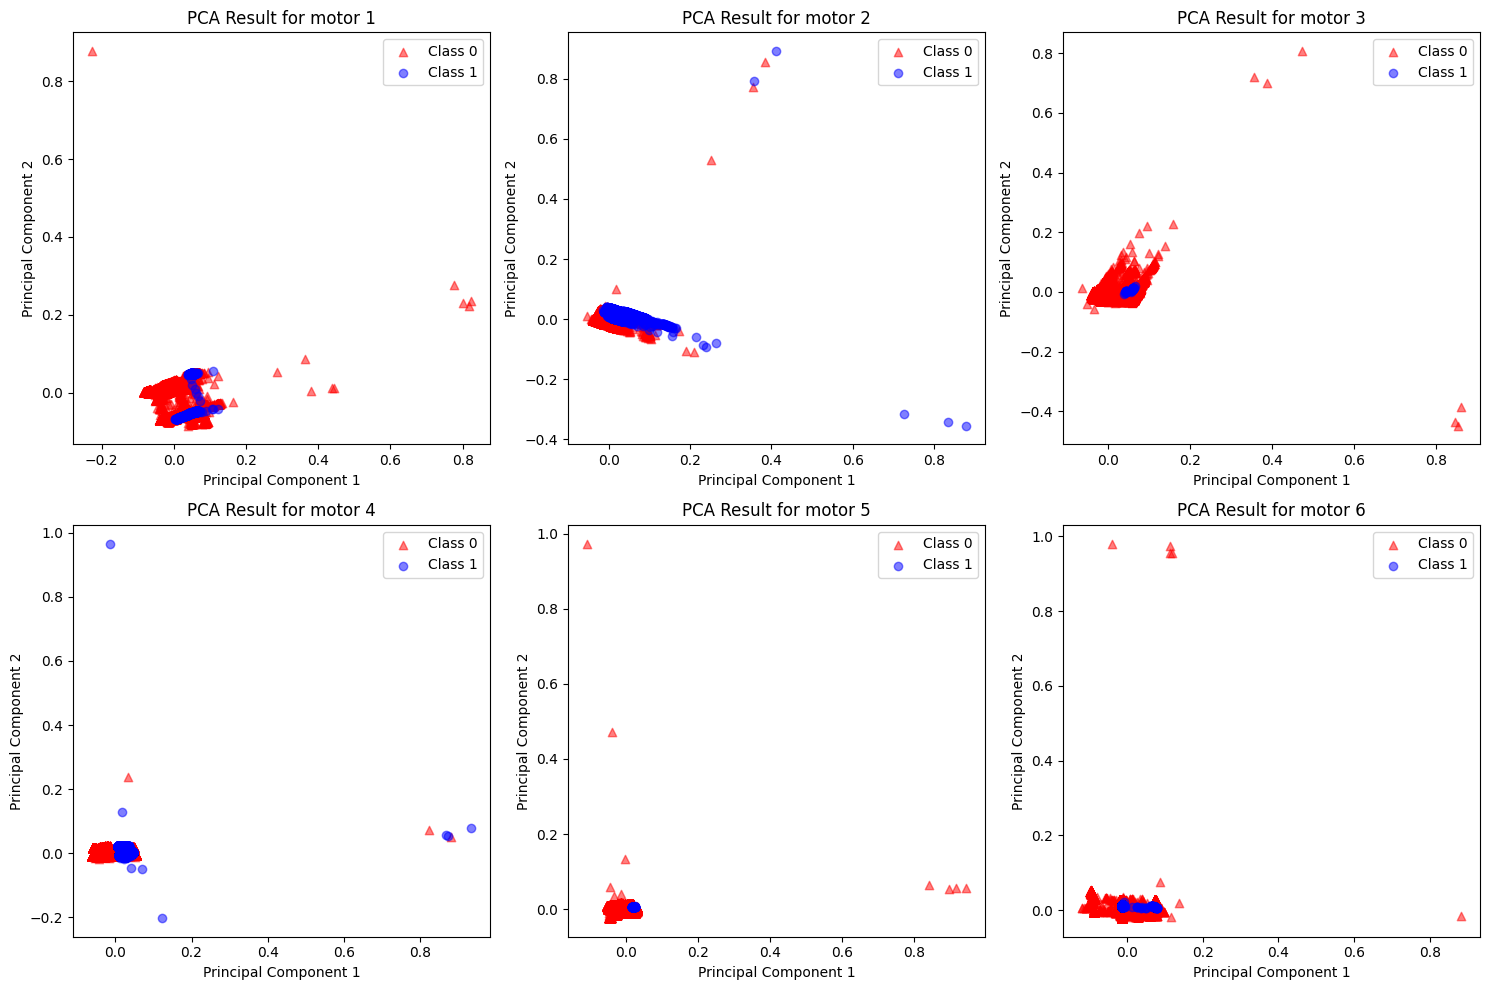

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < 6:  # Limit the number of iterations to the number of subplots
        X = df_data[df_data.columns[i * 4 + 1:i * 4 + 4]]
        y = df_data[df_data.columns[i * 4 + 4]]
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
        ax.set_title(f'PCA Result for motor {i+1}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend()

plt.tight_layout()
plt.show()


## Task 2: Define a strategy to remove outliers.

We used the Interquartile Range (IQR) method and adapted it.
We Calculate Quartiles and IQR:
For each numerical column of interest in the dataset,we calculate the 5% quartile and the 95% quartile.
We Define Lower and Upper Bounds.
For each numerical column,we remove any data points that fall below the lower bound or above the upper bound and we retain data points within the bounds.

In [47]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  
    for column in columns:
        # Calculate Q1 (5th percentile) and Q3 (95th percentile)
        Q1 = df_cleaned[column].quantile(0.05)
        Q3 = df_cleaned[column].quantile(0.95)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

columns_to_remove_outliers = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                              'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                              'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                              'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                              'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                              'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

df_cleaned = remove_outliers_iqr(df_data, columns_to_remove_outliers)



Here we display the new PCA result 

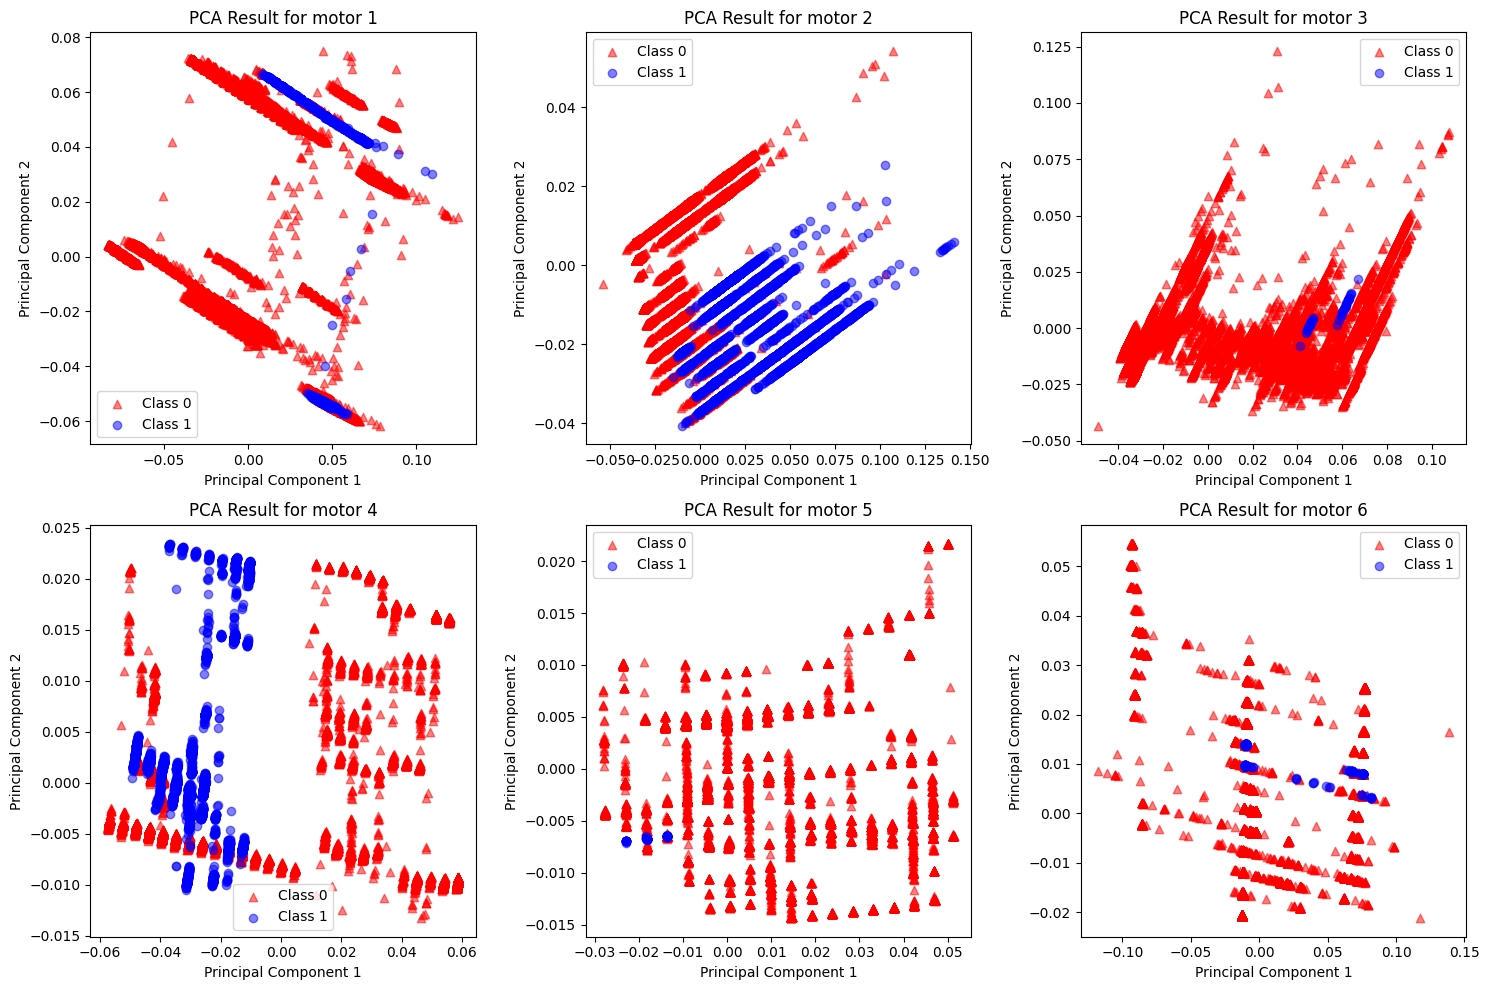

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < 6:  
        X = df_cleaned[df_data.columns[i * 4 + 1:i * 4 + 4]]
        y = df_cleaned[df_data.columns[i * 4 + 4]]
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
        ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
        ax.set_title(f'PCA Result for motor {i+1}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.legend()

plt.tight_layout()

plt.show()

We see that the data is better scaled and the outliers that we noticed in the initial data are removed

Here we display the new box plots

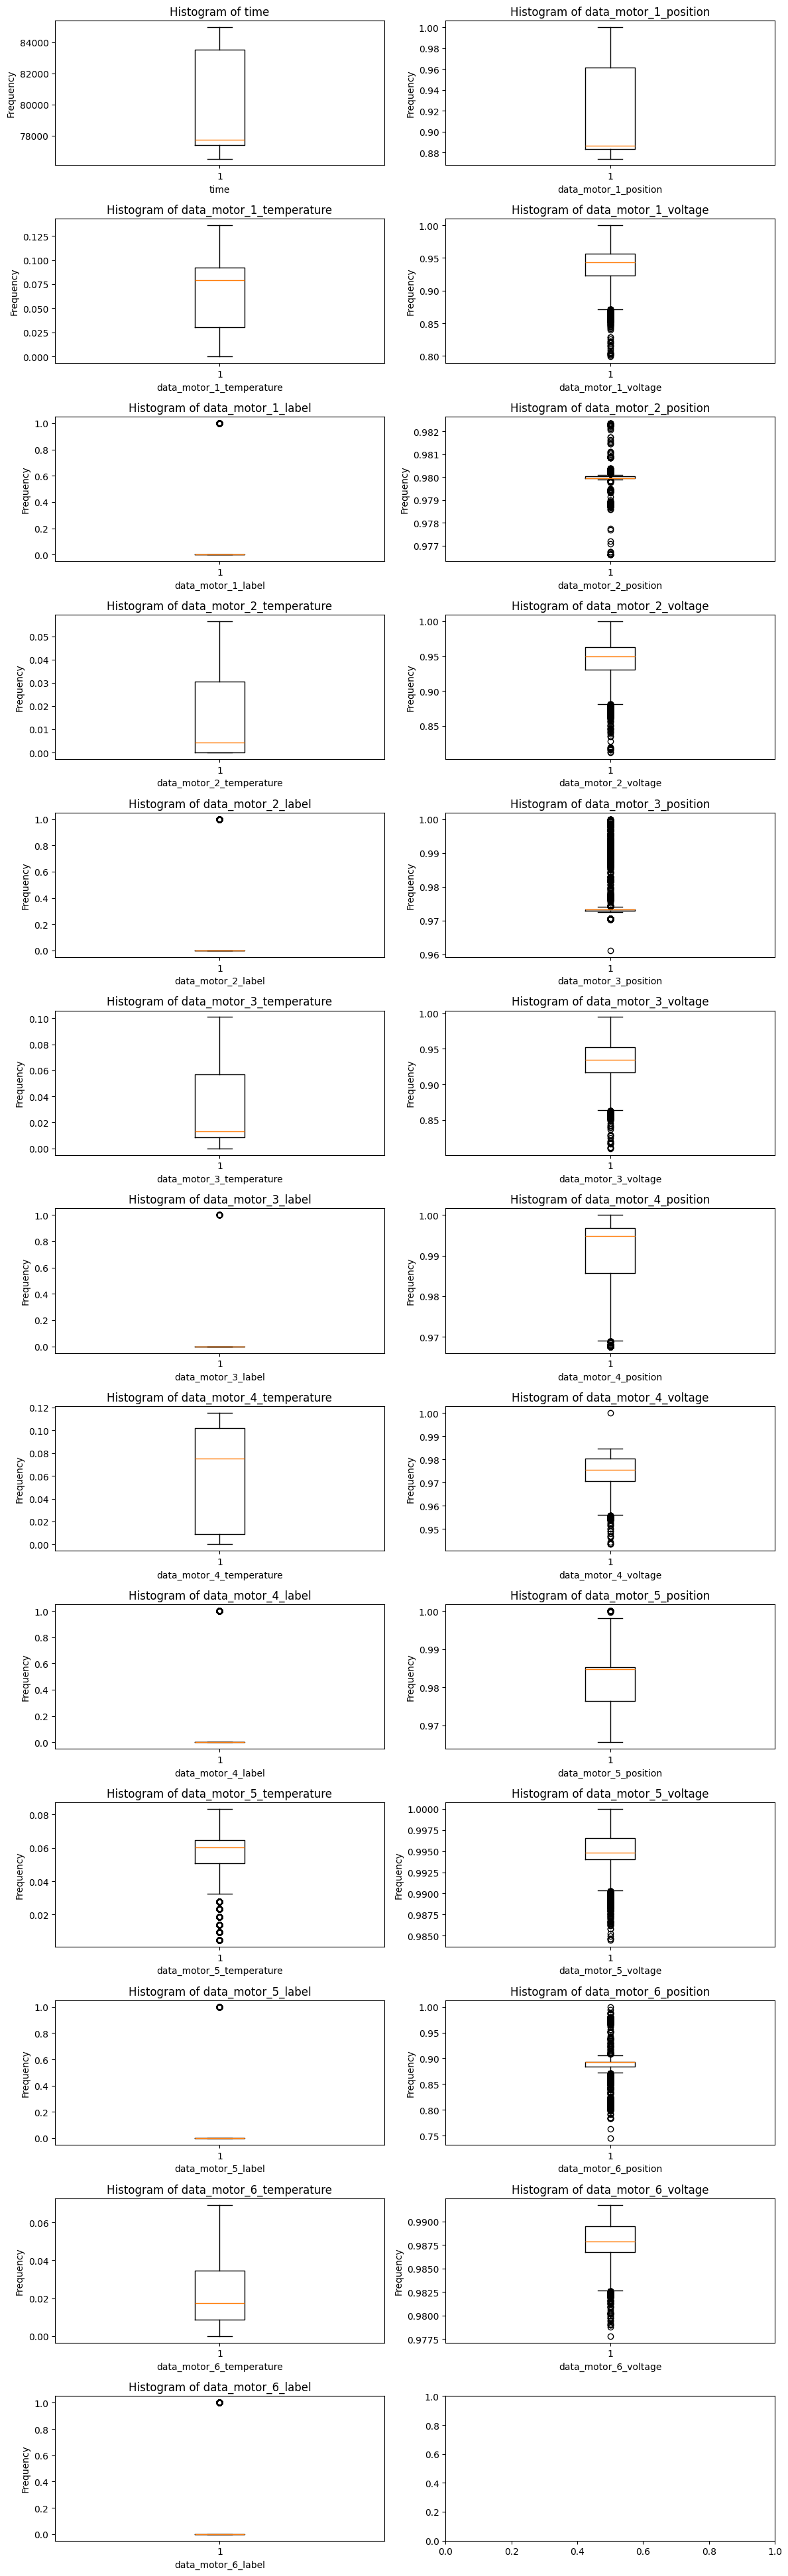

In [49]:
num_cols = len(df_cleaned.columns)
num_rows = (num_cols + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))

axes = axes.flatten()

for i, column in enumerate(df_cleaned.columns):
    if column=="test_condition" : continue
    ax = axes[i]
    ax.boxplot(df_cleaned[column])  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Task 3: Define a strategy to smooth the data.

Smooth the data using the moving average technique.

Parameters:  data : Input data to be smoothed /the columns to smooth/ window_size : Size of the moving average window.


In [72]:
import pandas as pd

def smooth_columns(data, columns_to_smooth, window_size):
    smoothed_data = data.copy()
    for column in columns_to_smooth:
        smoothed_data[column] = data[column].rolling(window=window_size, min_periods=1).mean()
    
    return smoothed_data

smoothed_data = smooth_columns(df_cleaned,columns_to_remove_outliers, 5)
smoothed_data

time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433               0.887035                  0.065789   
1      76522.125464               0.887035                  0.065789   
2      76522.225432               0.887035                  0.065789   
3      76522.325432               0.887035                  0.065789   
4      76522.425451               0.887035                  0.065789   
...             ...                    ...                       ...   
31130  84966.426470               0.910355                  0.114035   
31131  84966.526530               0.910355                  0.114035   
31132  84966.626610               0.910355                  0.114035   
31133  84966.726460               0.910355                  0.114035   
31134  84966.826470               0.910355                  0.114035   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  0.963622                   0               0.979963   
1                  0.963125                   0               0.979993   
2                  0.960121                   0               0.979983   
3                  0.958564                   0               0.979978   
4                  0.959332                   0               0.979987   
...                     ...                 ...                    ...   
31130              0.955484                   0               0.978838   
31131              0.955728                   0               0.978838   
31132              0.955794                   0               0.978838   
31133              0.956413                   0               0.978826   
31134              0.956103                   0               0.978826   

       data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                      0.013043              0.970518                   0   
1                      0.013043              0.965949                   0   
2                      0.013043              0.963845                   0   
3                      0.013043              0.963229                   0   
4                      0.013043              0.962467                   0   
...                         ...                   ...                 ...   
31130                  0.034783              0.962511                   1   
31131                  0.034783              0.961945                   1   
31132                  0.034783              0.961097                   1   
31133                  0.034783              0.961706                   1   
31134                  0.034783              0.962141                   1   

       data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                   0.973290  ...                   0               0.985219   
1                   0.973290  ...                   0               0.985219   
2                   0.973271  ...                   0               0.985219   
3                   0.973261  ...                   0               0.985219   
4                   0.973255  ...                   0               0.985219   
...                      ...  ...                 ...                    ...   
31130               0.988040  ...                   1               0.965567   
31131               0.988052  ...                   1               0.965567   
31132               0.988064  ...                   1               0.965579   
31133               0.988064  ...                   1               0.965567   
31134               0.988064  ...                   1               0.965567   

       data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                      0.032407              0.996569                   0   
1                      0.032407              0.996873                   0   
2                      0.032407              0.996954                   0   
3                      0.032407              0.996911              

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

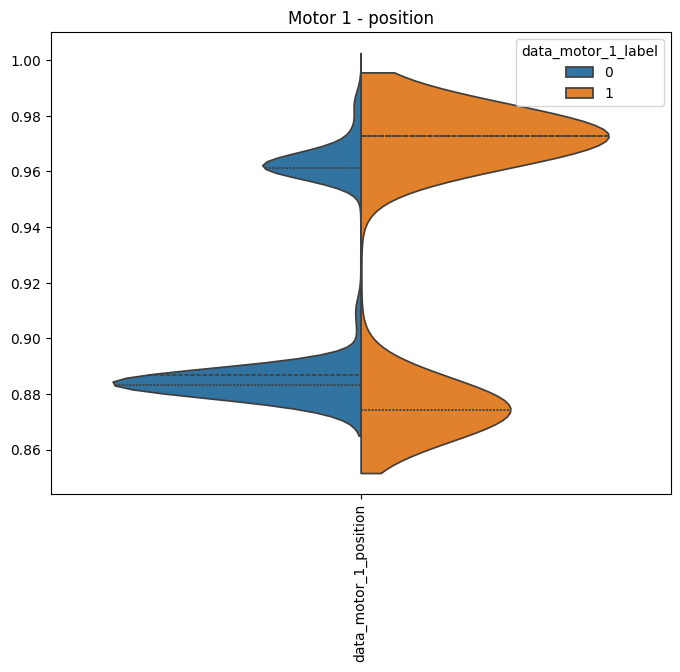

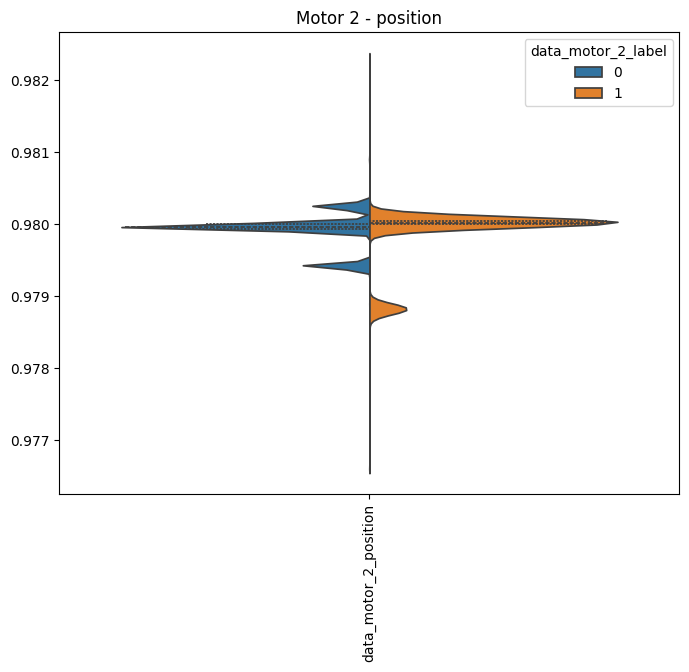

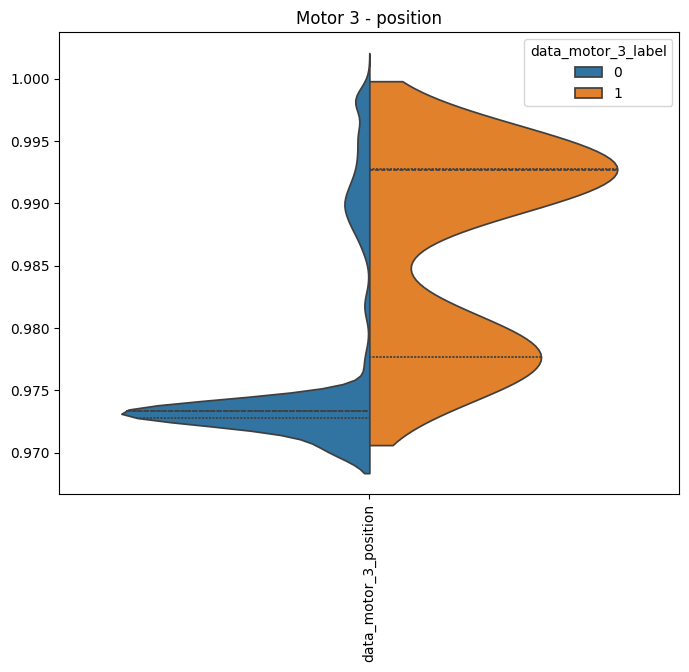

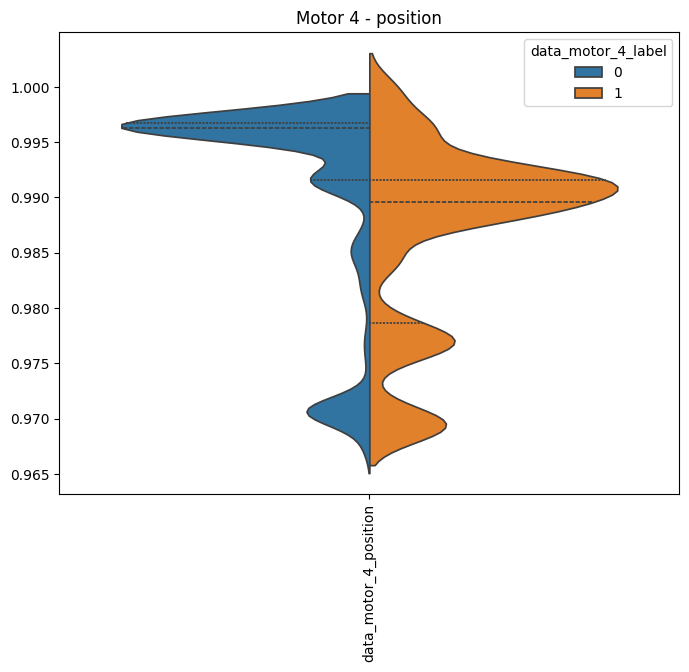

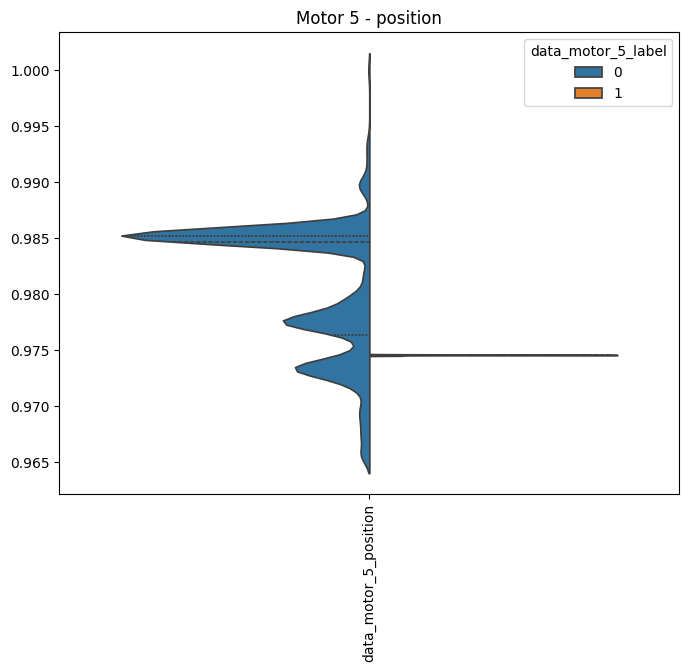

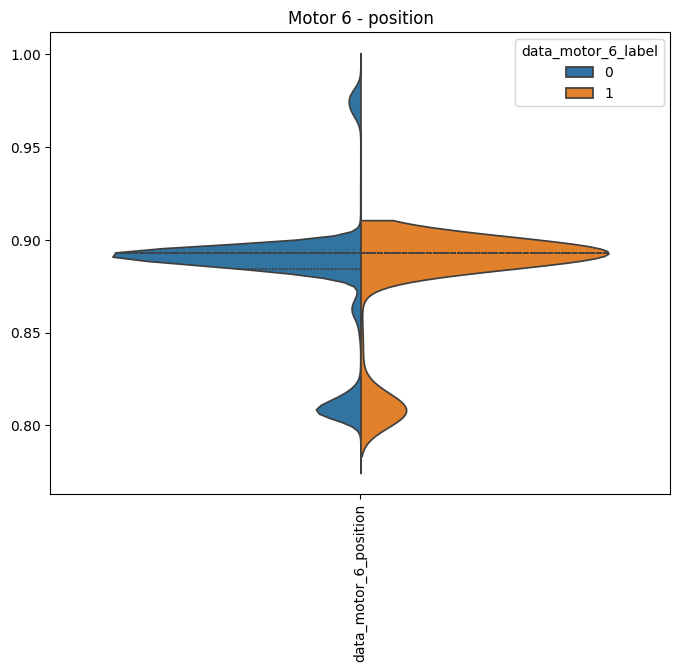

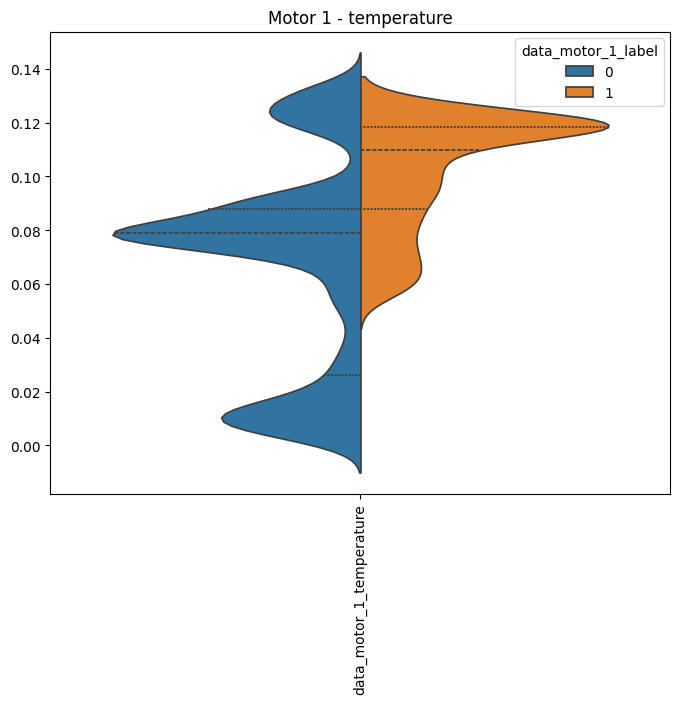

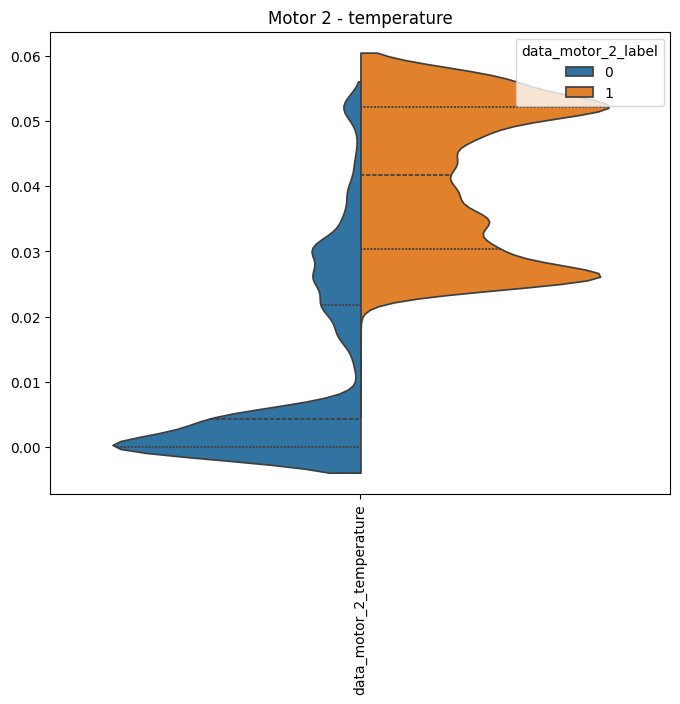

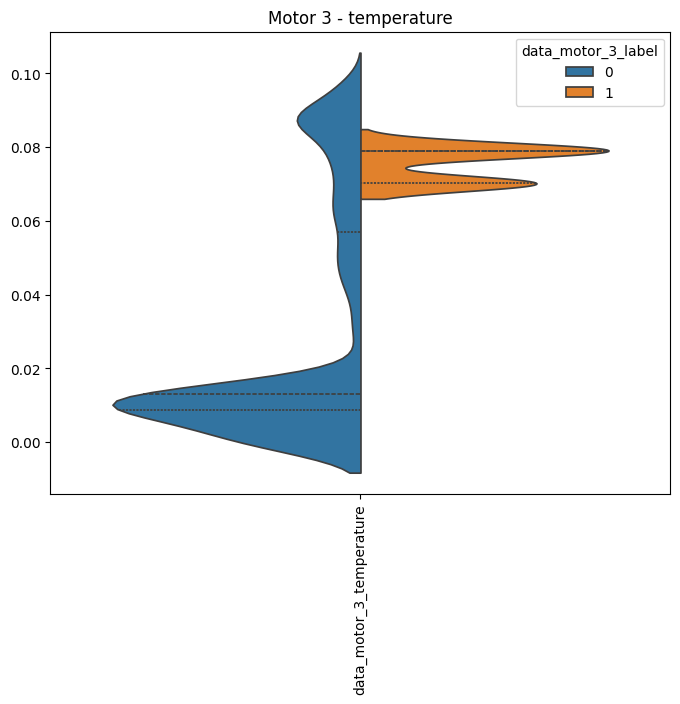

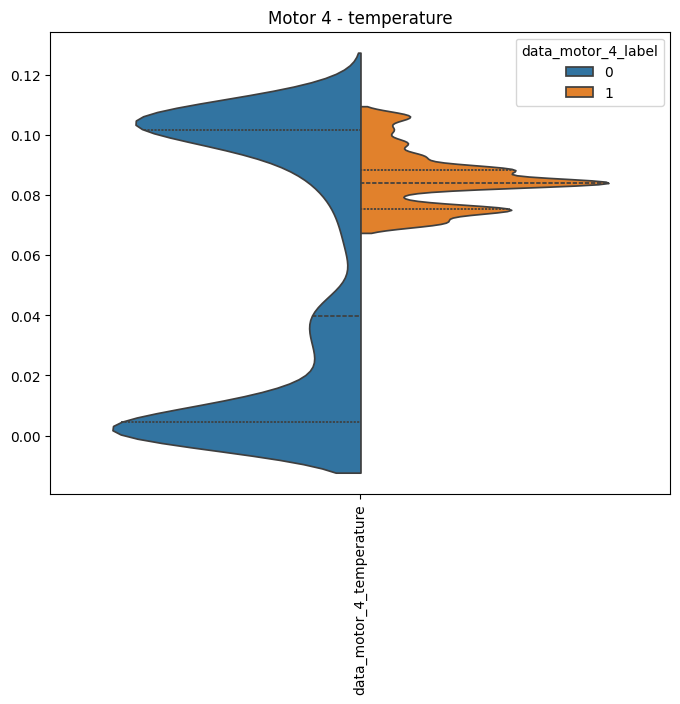

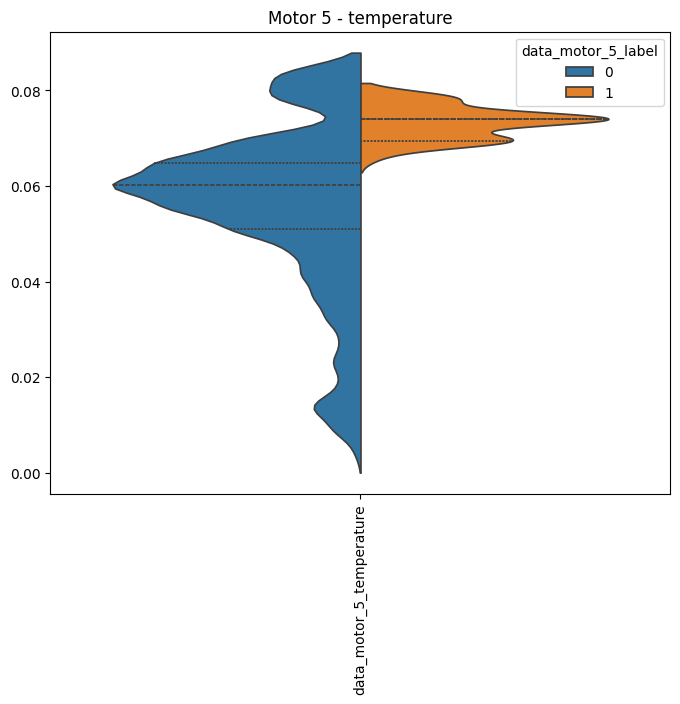

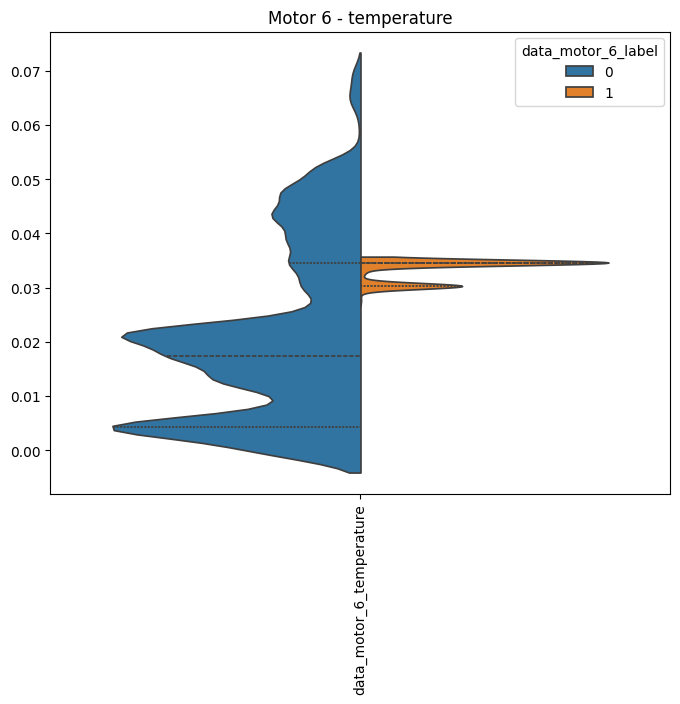

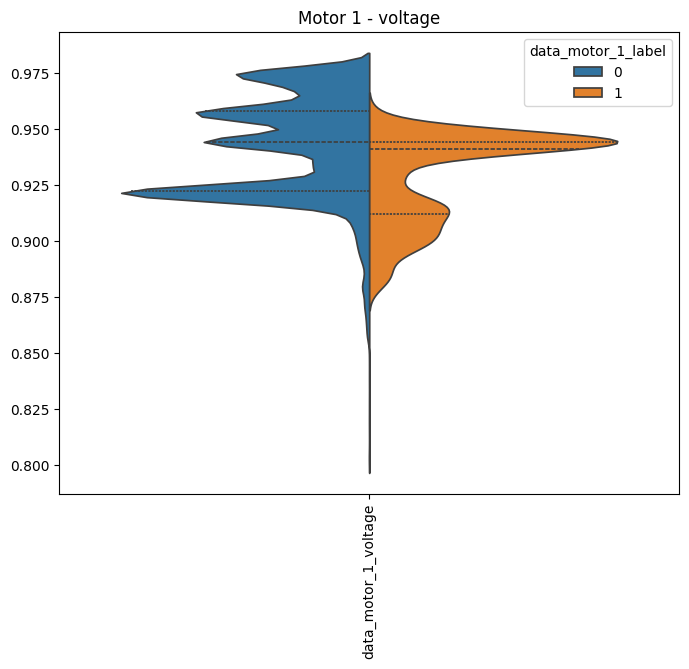

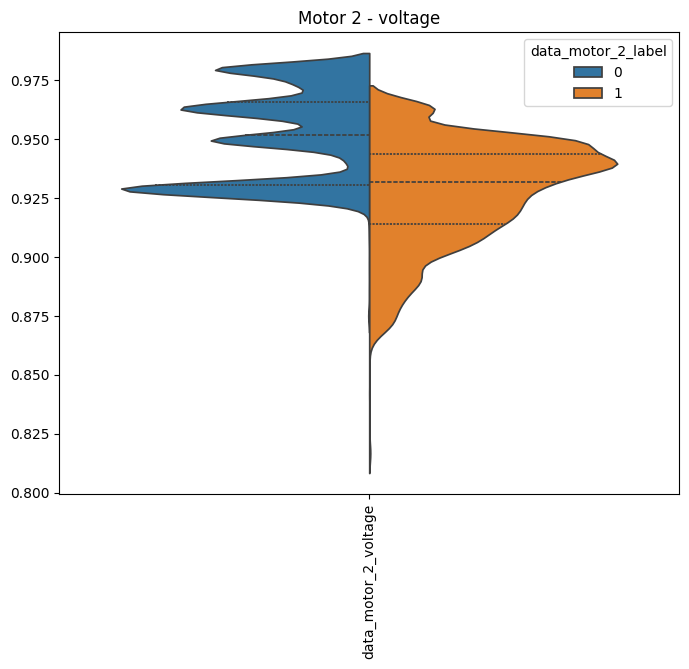

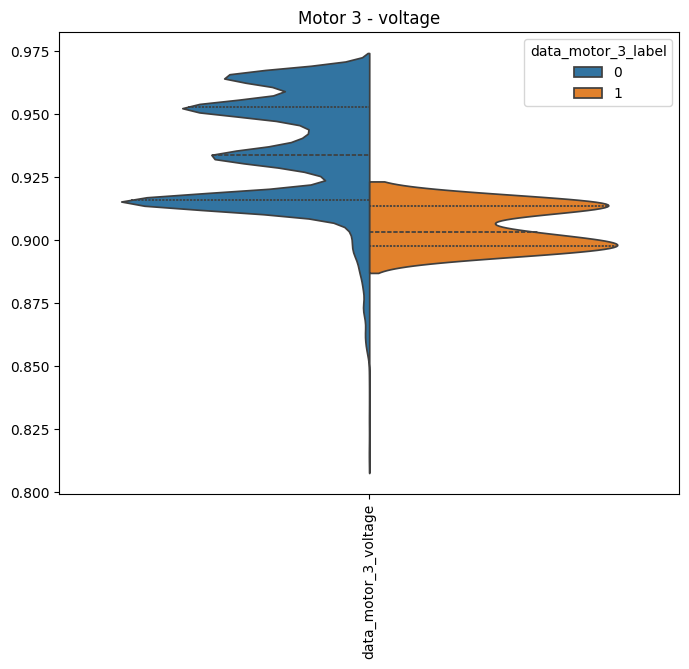

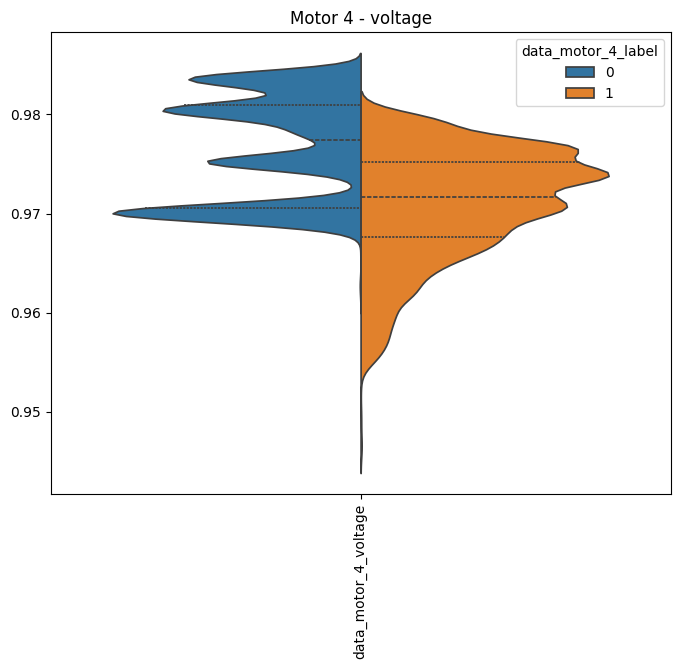

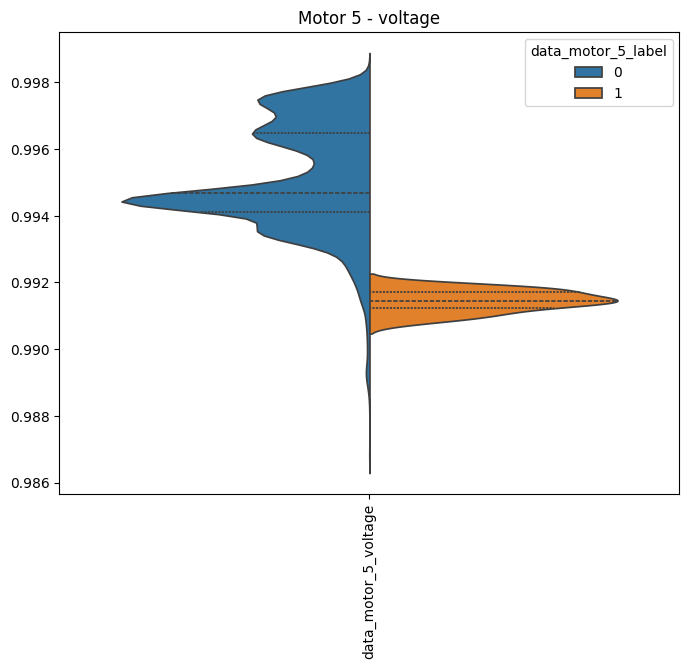

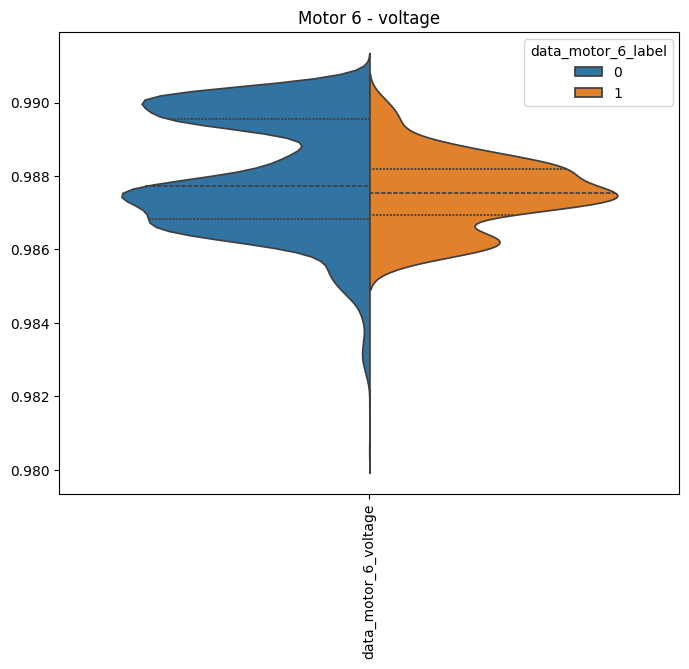

In [81]:
motor_features = ['position', 'temperature', 'voltage']

for feature in motor_features:
    for j in range(1, 7):  
        data = smoothed_data[[f'data_motor_{j}_{feature}', f'data_motor_{j}_label']] 
        data_melted = pd.melt(data, id_vars=f'data_motor_{j}_label', var_name="features", value_name='value')
        
        plt.figure(figsize=(8, 6))
        sns.violinplot(x="features", y="value", hue=f"data_motor_{j}_label", data=data_melted, split=True, inner="quart")
        plt.title(f'Motor {j} - {feature}')
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=90)
        
        plt.show()


## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

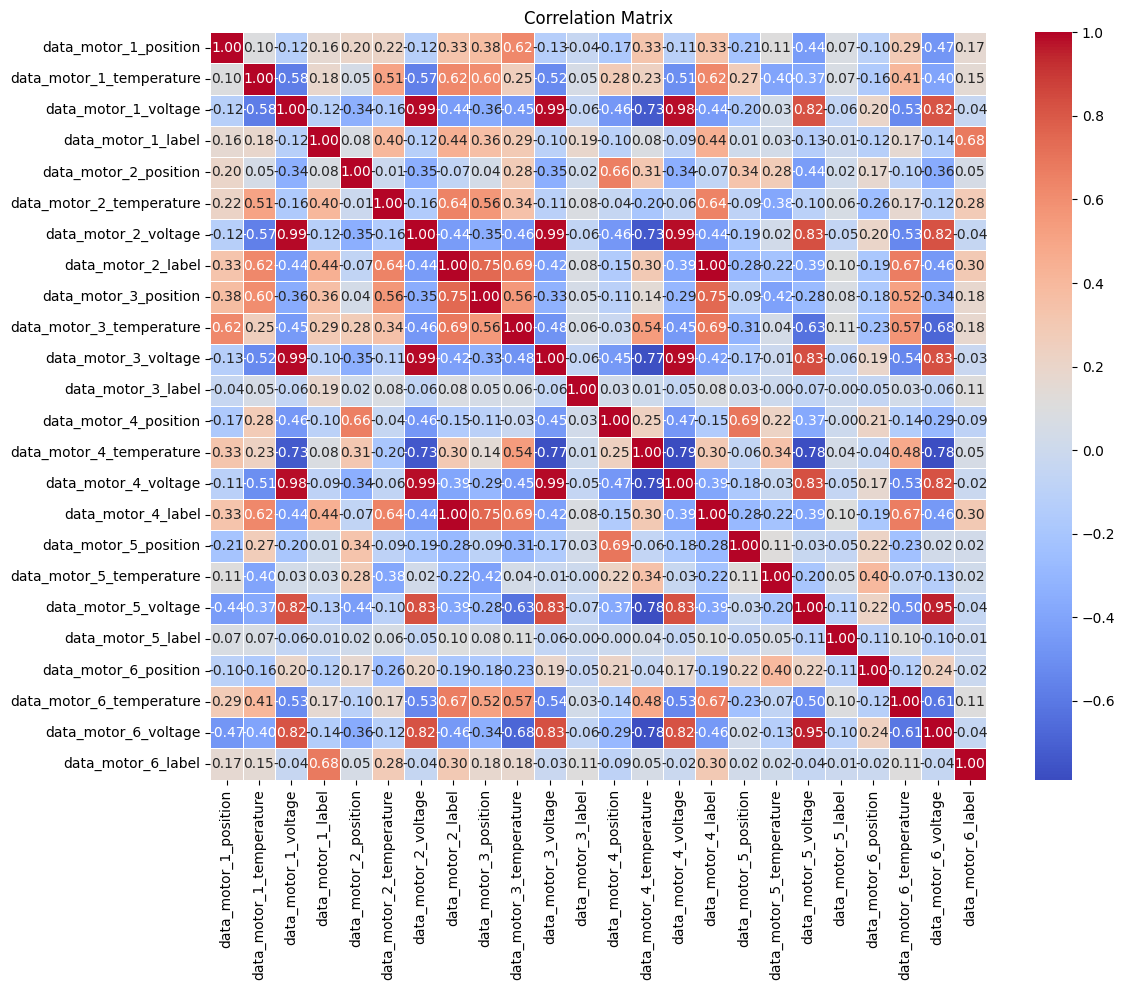

In [56]:
correlation_matrix = smoothed_data.iloc[:, 1:-1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()


## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?




According to the violin plot, we see that the features "data_motor_1_temperature" is the most relelvant for the label of motor 1 and the features "data_motor_1_position" and "data_motor_1_voltage" are not relevant.

Same thing applies for motor 2 and 6.

However, we see that the all the features "data_motor_3_temperature" and "data_motor_3_voltage" and "data_motor_1_position" are quite all relelvant for the label of motor 3.

Same thing for motor 5

For the motor 4, the features "data_motor_3_temperature"  and "data_motor_1_position" are quite  relelvant for the label but not much for  "data_motor_4_voltage"

Regarding the correlation matrix, we see a big correlation between "data_motor_voltage" for motors 1,2,3 and 4 on one side and motors 5 and 6 on the other. We also see a correlation between "data_motor_4_temperature" and all the voltage data of the motors.

We can finally decide to use these features :
features_to_use = [   'data_motor_1_temperature',
                    'data_motor_2_temperature', 
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_temperature', ]





